<a href="https://colab.research.google.com/github/Saniyashakur22/ML-Classification-Project/blob/main/ML_Classification_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Mobile Price Range Prediction using Machine Learning**

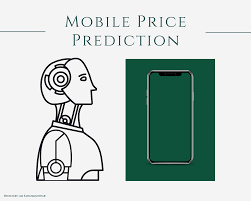

# ***Problem Statement:***

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.



### ***Data Description :***
**Battery_power** - Total energy a battery can store in one time measured in mAh

**Blue** - Has bluetooth or not

**Clock_speed** - speed at which microprocessor executes instructions

**Dual_sim** - Has dual sim support or not

**Fc** - Front Camera mega pixels

**Four_g** - Has 4G or not

**Int_memory** - Internal Memory in Gigabytes

**M_dep** - Mobile Depth in cm

**Mobile_wt** - Weight of mobile phone

**N_cores** - Number of cores of processor

**Pc** - Primary Camera mega pixels

**Px_height** - Pixel Resolution Height

**Px_width** - Pixel Resolution Width

**Ram** - Random Access Memory in Mega Bytes

**Sc_h** - Screen Height of mobile in cm

**Sc_w** - Screen Width of mobile in cm

**Talk_time** - longest time that a single battery charge will last

**Three_g** - Has 3G or not

**Touch_screen** - Has touch screen or not

**Wifi** - Has wifi or not

**Price_range** - This is the target variable with value of

0(low cost),

1(medium cost),

2(high cost) and

3(very high cost).

Thus our target variable has 4 categories so basically it is a Multiclass classification problem.

In [ ]:
##Importing the requried libraries and modules
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset
from google.colab import files
upload=files.upload()

Saving data_mobile_price_range.csv to data_mobile_price_range.csv


In [ ]:
#Importing the dataset
df_main = pd.read_csv(io.BytesIO(upload['data_mobile_price_range.csv']))
print(df_main)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

# ***Data Exploration And Data Cleaning***


In [ ]:
# Checking first five rows
df_main.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [ ]:
# Checking last five rows

df_main.tail()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[5 rows x 21 columns]

In [ ]:
## Checking total rows and columns in the dataset

print("Shape of Dataframe is :" ,df_main.shape , "\n", "Total number of rows in dataset : ",df_main.shape [0], "\n","Total number of columns in dataset : ",df_main.shape [1], "\n",)


Shape of Dataframe is : (2000, 21) 
 Total number of rows in dataset :  2000 
 Total number of columns in dataset :  21 



In [ ]:
# Checking Statistic of the data

df_main.describe().T.style.background_gradient()

In [ ]:
# Another Method to do it
df_main.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

From the above output,

  Its not possible to have minimum value 0 of sc_width and px_height in any mobile so we need to handle this mismatch.


In [ ]:
# Checking How many observations having screen width value as 0.
print(df_main[df_main['sc_w'] == 0].shape[0])

180


In [ ]:
# Checking How many observations having px_hieght value as 0.
print(df_main[df_main['px_height']==0].shape[0])

2


In [ ]:
# As there are only 2 observations having px_height=0. so we will drop it.
df_main=df_main[df_main['px_height']!=0]

In [ ]:
## Checking columns

df_main.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
## checking datatypes of columns

df_main.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

## Nearest Neighbors Imputations (KNNImputer)

Missing values are imputed using the k-Nearest Neighbors approach where a Euclidean distance is used to find the nearest neighbors.

Let’s take the above example of the titanic dataset to see how it works.
* Before using KNN Imputer we need to replace 0 with NAN values. so that it will work.

In [ ]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
df_main['sc_w']=df_main['sc_w'].replace(0,np.nan)

In [ ]:
# import KNN imputer frio sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
df_main=pd.DataFrame(impute_knn.fit_transform(df_main),columns=df_main.columns)

In [ ]:
# Checking shape
df_main.shape

(2000, 21)

In [ ]:
# Checking How many observations having sc_w value as 0.
df_main[df_main['sc_w']==0].shape[0]

0

**Thus we have handled our mismatched values of the data.**

In [ ]:
## Checking the info of dataframe and knowing data types of columns.

df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   float64
 1   blue           2000 non-null   float64
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   float64
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   float64
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   float64
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   float64
 17  three_g        2000 non-null   float64
 18  touch_sc

### **So here we can see,**

**1. We don't have any object data type in our data set.**

**2. Also we have Zero null values in data set.**

**3. Price_range is our target variable.**

In [ ]:
#checking null values
df_main.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**Form above output we can see that there is not missing or null value in our dataset. So we move to above analysis.**

In [ ]:
#set style
# plt.style.use('seaborn')
sns.set()


# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

Text(0.5, 1.0, ' Visualising Missing Values')

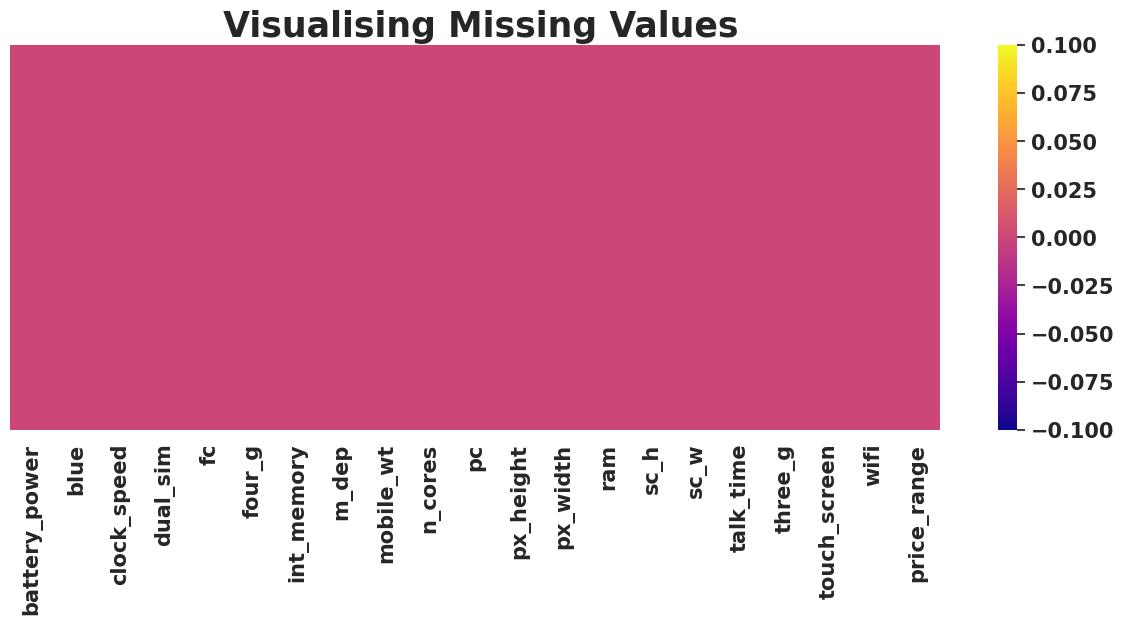

In [ ]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(df_main.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

**So form above heatmap we can see that we do not habing any missing value in our data.**

In [ ]:
## Checking Duplicate rows in our Dataset.
duplicates=df_main.duplicated().sum()
print(f"We are haveing {duplicates} rows in our Dataframe.")

We are haveing 0 rows in our Dataframe.


# ***Exploratory Analysis and Visualization***

**Let,s see our hero of our story i.e our target variable...........**

In [ ]:
# lets have look at our target variable's counts
price_range_values=df_main['price_range'].value_counts()
price_range_values

1.0    500
2.0    500
3.0    500
0.0    500
Name: price_range, dtype: int64

***Wow.! we have almost equal number of obseravtions for each category. Thus we don't have imbalanced target variable.Accuracy score will be the best evalaution metric for us to select the model.***

***This is the target variable with value of***

***0=low cost,***

***1=medium cost,***

***2=high cost,***

***3=very high cost.***

<Axes: ylabel='price_range'>

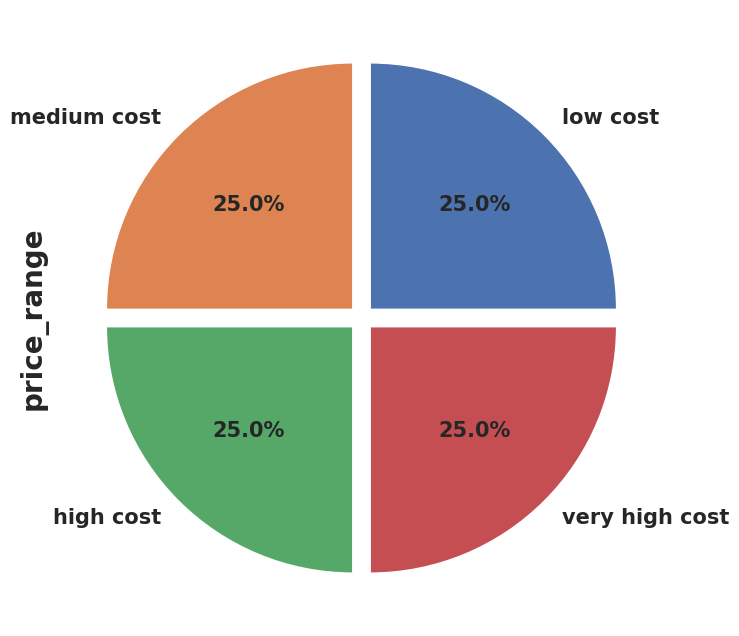

In [ ]:
# Visualizing the Target variable's class distribution.
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15)    # plotting pie chart




*   **We can see that our target varibale is nearly equally distributed.**

*   **Thus we don't have to worry about data imbalance and there is no need of oversampling or undersampling.Which is good for us.**

### So let's move ahead !



# ***Let's checking correlation between target(dependent) variable and independent variable***

<Axes: >

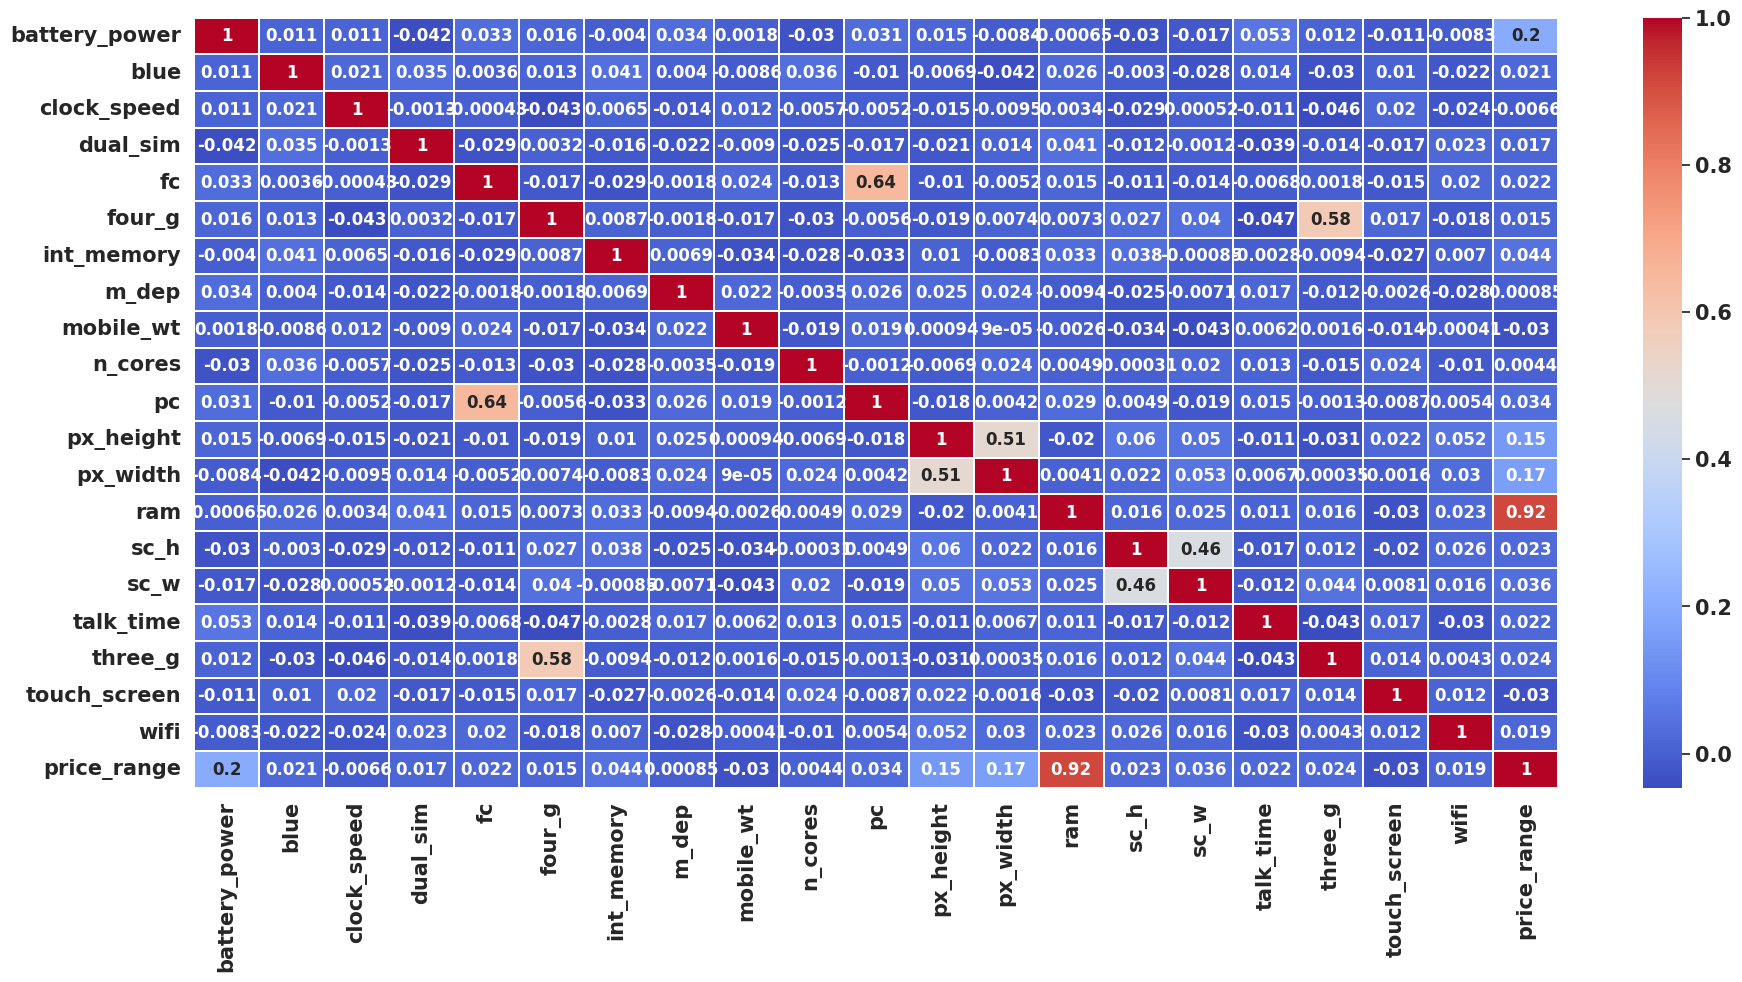

In [ ]:
data_corr= df_main.corr()
plt.figure(figsize=(22,10))

#cmap use for colour palette , linewidths : set the width of the lines that divide the cells,
#annot :helps in annotating the heatmap with values if set to True, otherwise values are not provided , linecolor : helps in setting the color of each line that divides heatmap cells
sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

### **Observations:**

**1. RAM has strong positive correlation with the Price_range. and we know that Mobiles with high RAM are very costly. Thus RAM increases price range also increase.**


**2. Battery_power also has positive correlation with the price range.Generally mobiles having high prices comes with good battery power.**


**3. Also px_height and px_width (Pixel Resolution Height and width) are positively correlated. Generally High price range mobiles have good resolutions.**


**4. Four_g and Three_g are highly positvely correlated. Nowdays most of the smart mobiles has both type of options. This could be the reason that they are correlated.**


**5. Primary camera i.e pc and front camera fc are positively correlated.**


**6. sc_h and sc_w are positively correlated**

# **Univariate Analysis of Categorical columns.**

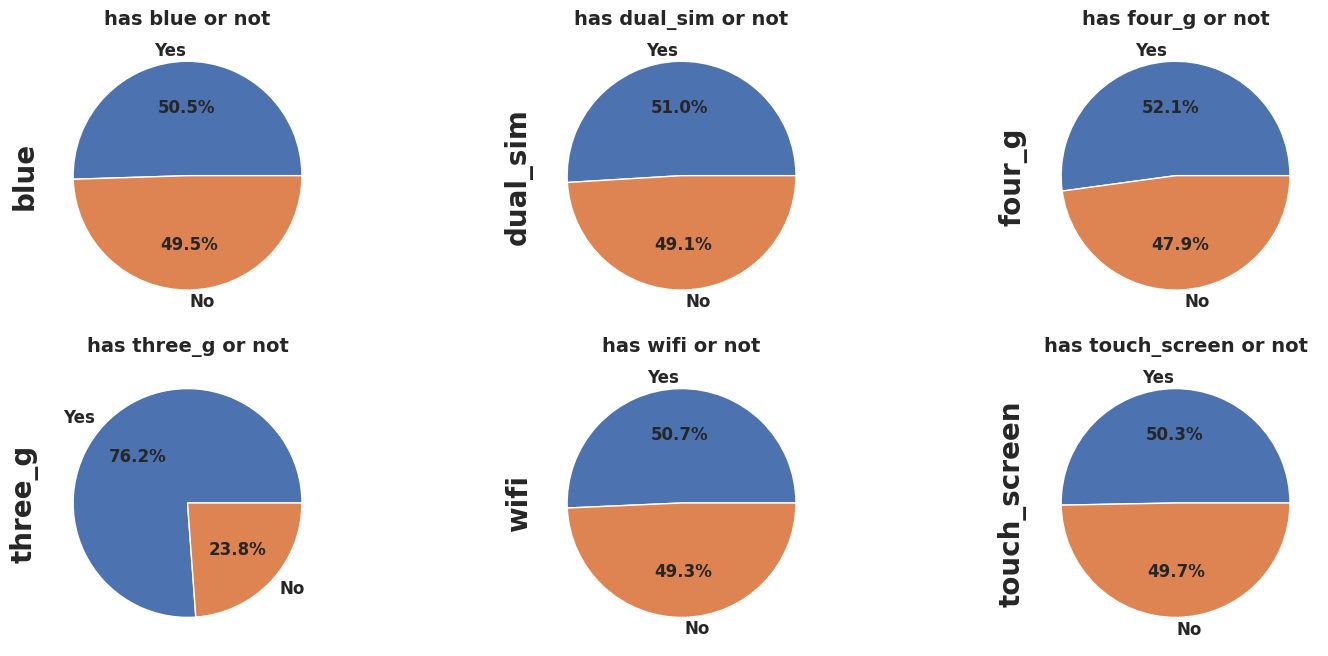

In [ ]:
# Plotting the piecharts for binary categorical variables.
plt.figure(figsize=(15,10))

rows=3
col=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in var_list:
  plt.subplot(rows,col,count)
  df_main[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=labels)
  plt.title(f'has {var} or not',fontsize=14)
  plt.tight_layout()
  count=count+1


***1. 1 means it has the specifications.***

***2. 0 means it do not have the specifications.***

***3. Percentage Distribution of Mobiles having bluetooth,dual sim, 4G,wifi and touchscreen are almost 50 %.***

***4. very few mobiles(23.8%) do not have Three_g.***

## **Relation Between RAM,Battery_power,px_height and px_width**

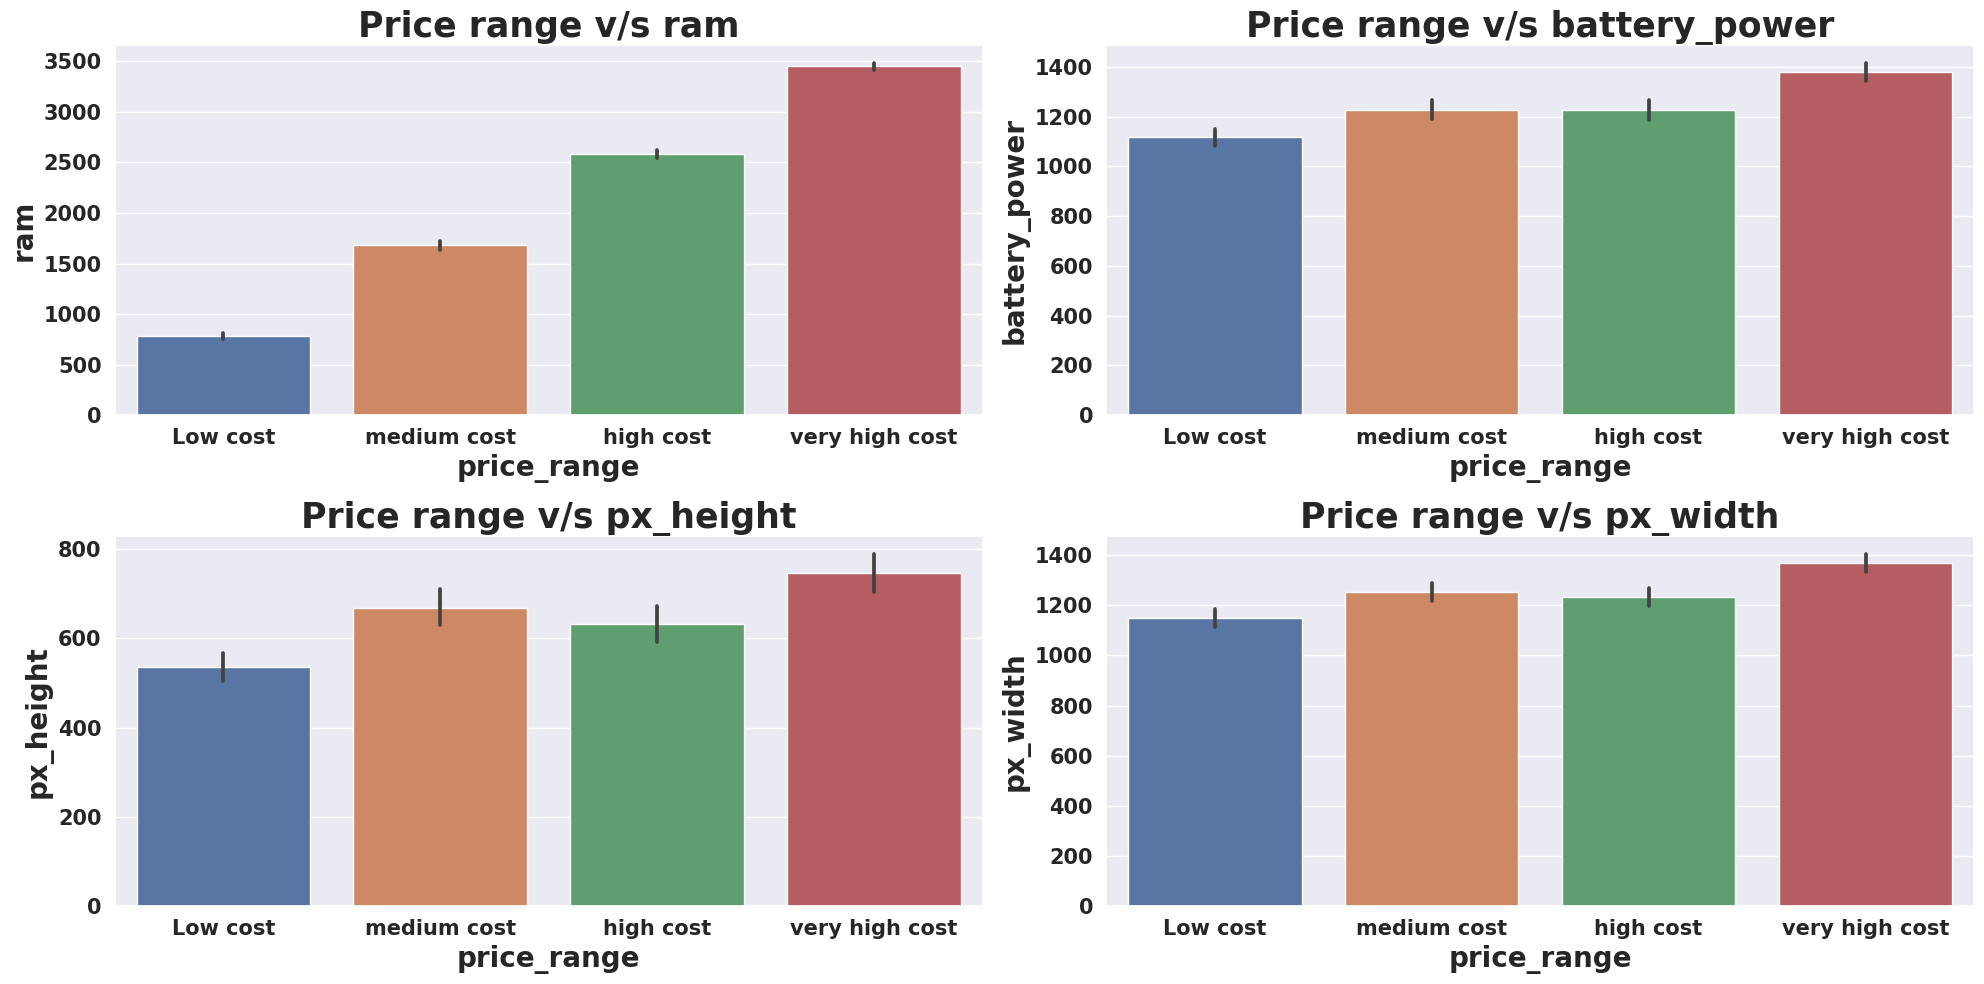

In [ ]:
# plotting  price_range vs other fearures
plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2
cols=2
counter=1

variables=['ram','battery_power','px_height','px_width']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=df_main['price_range'],y=df_main[var])
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()
  plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
  plt.xticks(rotation=0)



### **Observations:**
* ***Mobiles having RAM more than 3000MB falls under Very high cost category.As RAM increases price range also increases.***
* ***Mobiles having RAM less than 1000 MB falls under low cost category.***
* ***Mobiles with battery power more than 1300 mAh has very high cost. And Mobiles with battery power between 1200 and 1300 mAH falls under medium and high cost category.***
* ***Mobiles with more than 700 pixel height and width more than 1300 has very high cost.***

In [ ]:
# Checking the counts of binary categorical variables by grouping price range.
grup_by_price=df_main.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack()
my_colors = 'rgbkymc'

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Low cost'),
  Text(1, 0, 'medium cost'),
  Text(2, 0, 'high cost'),
  Text(3, 0, 'very high cost')])

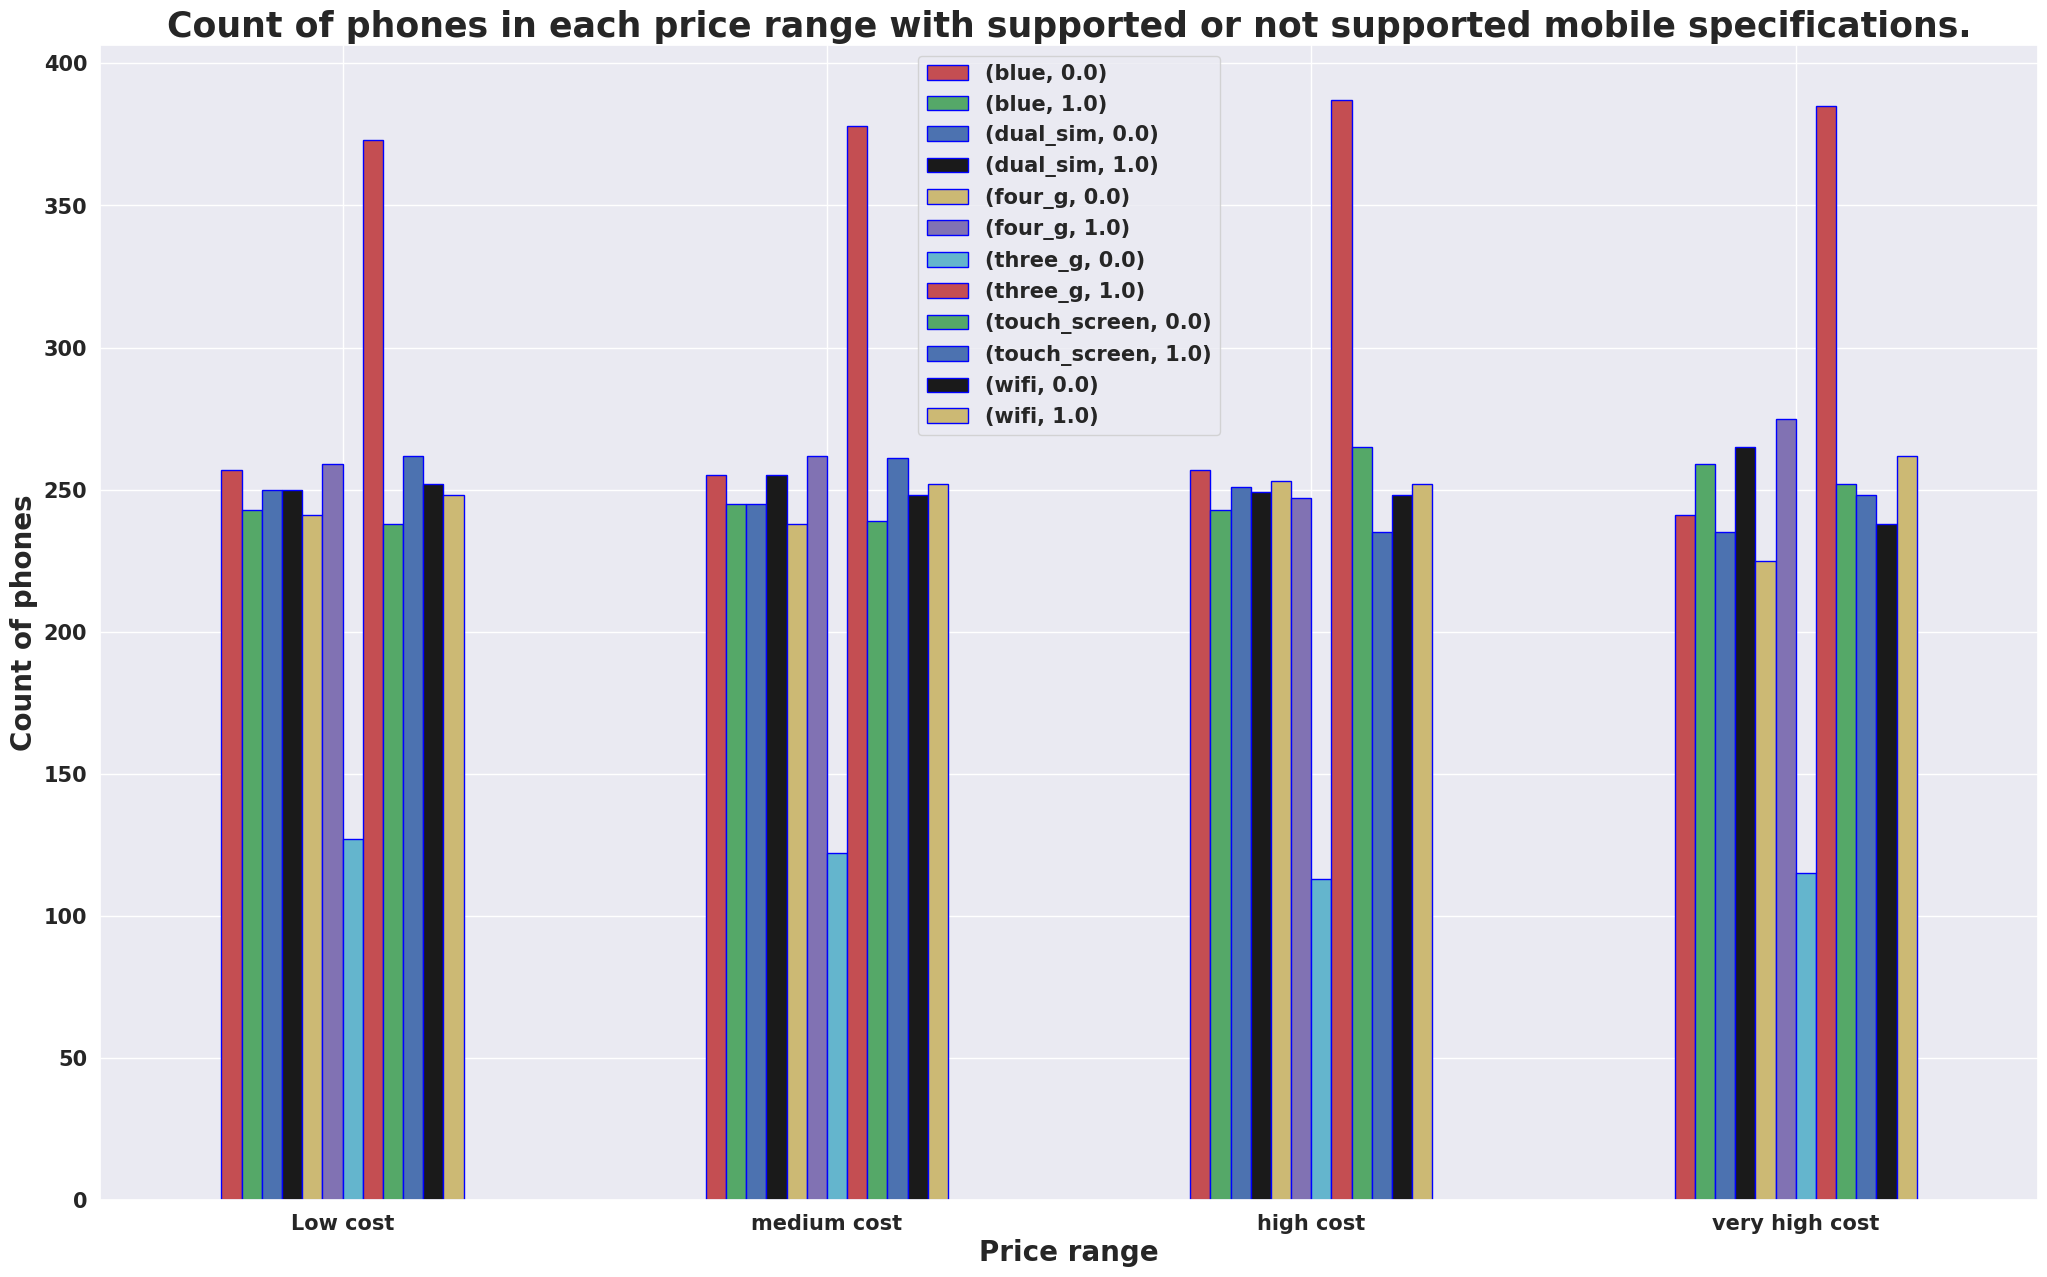

In [ ]:
# visualising by plotting barchat.
# plt.figure(figsize=(8,6))
grup_by_price.plot.bar(figsize=(25,15),edgecolor='blue',color=my_colors)
plt.title('Count of phones in each price range with supported or not supported mobile specifications.')
plt.xlabel('Price range')
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.ylabel('Count of phones')
plt.legend(loc='upper center')
plt.xticks(rotation=0)

### **Observations**

***We can see that each price range category has equal number of mobiles phones having both supporting and non supporting specifications.***

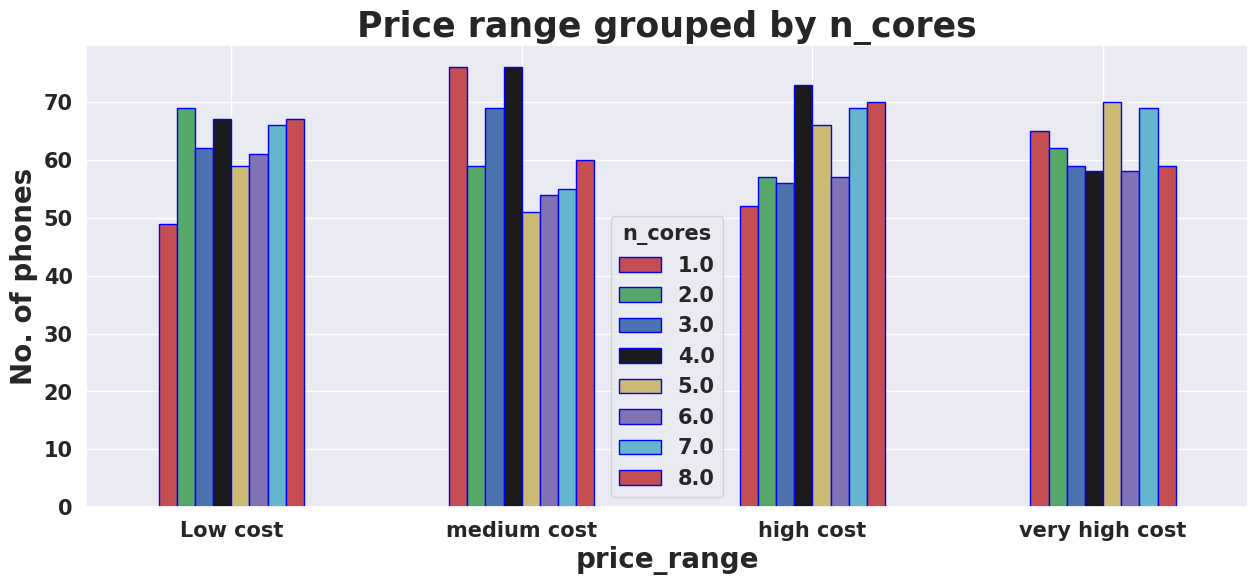

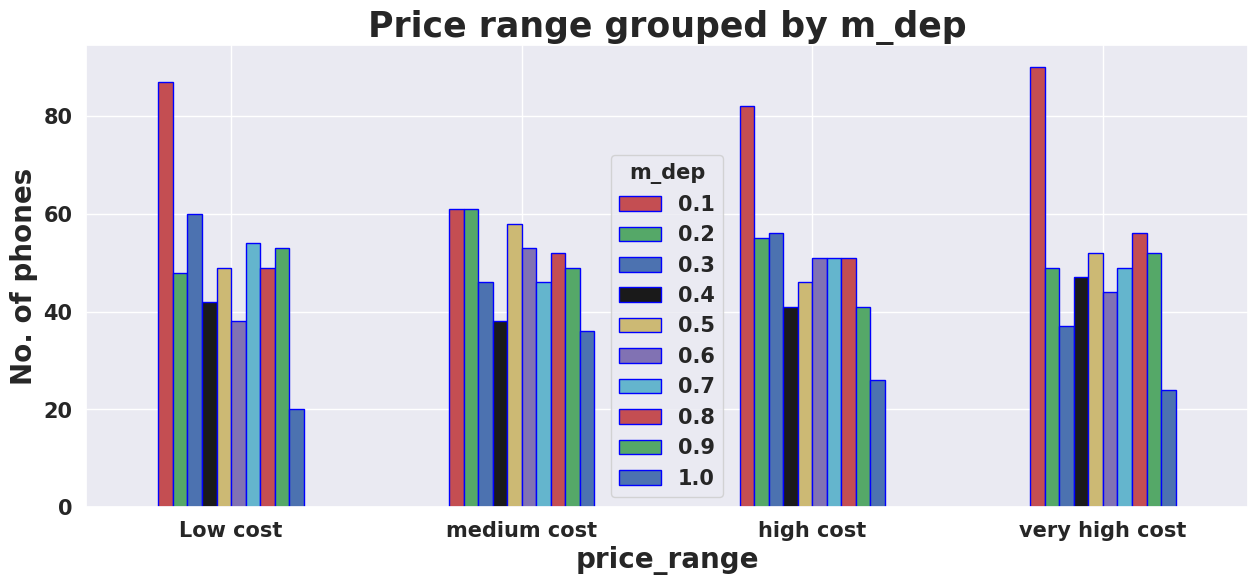

In [ ]:
list_2=['n_cores','m_dep']
for item in list_2:

  df_main.groupby(['price_range'])[item].value_counts().unstack().plot.bar(figsize=(15,6),edgecolor='blue',color=my_colors)
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')
  plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
  plt.xticks(rotation=0)

### **Observation**
* ***There are very few mobiles in price range 0 and 1 with lesser no of cores.***
* ***Most of the mobiles in price range 2 and 3 are with high no of cores.***

* ***Number of phones with less thickness is high and count of phones with high thickness is low.***

#**Let's Check which numerical feature is driving the price range most.**

In [ ]:
df_main.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

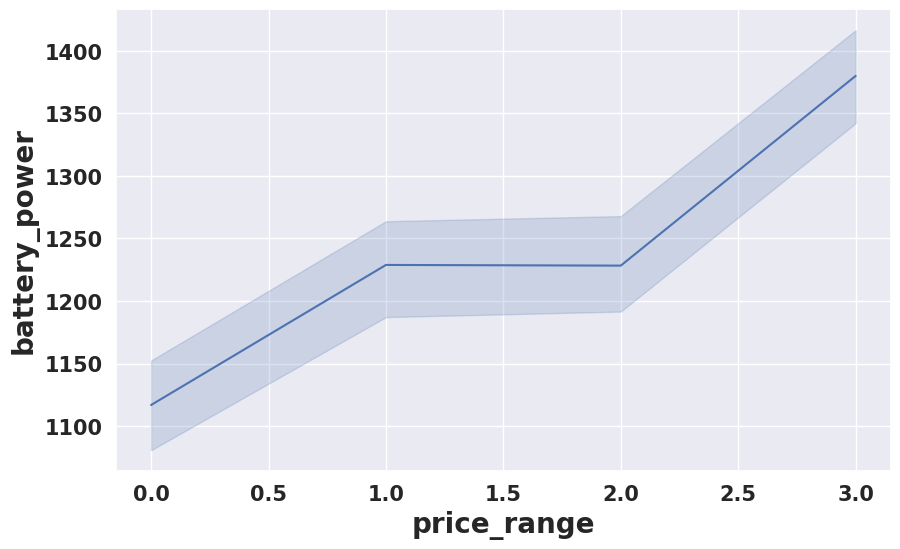

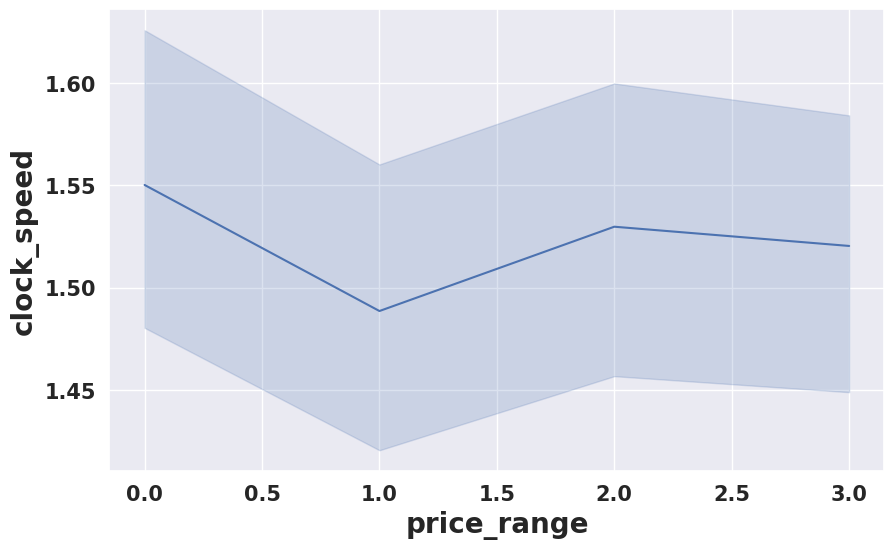

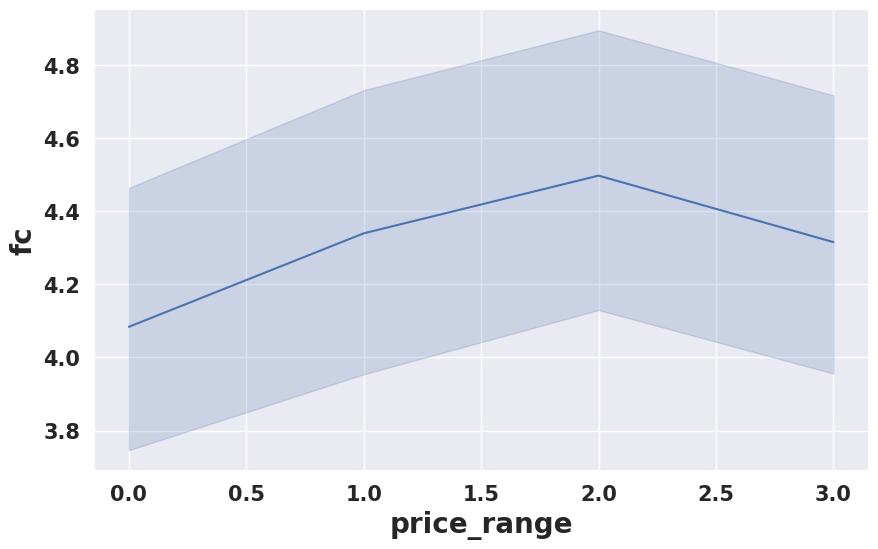

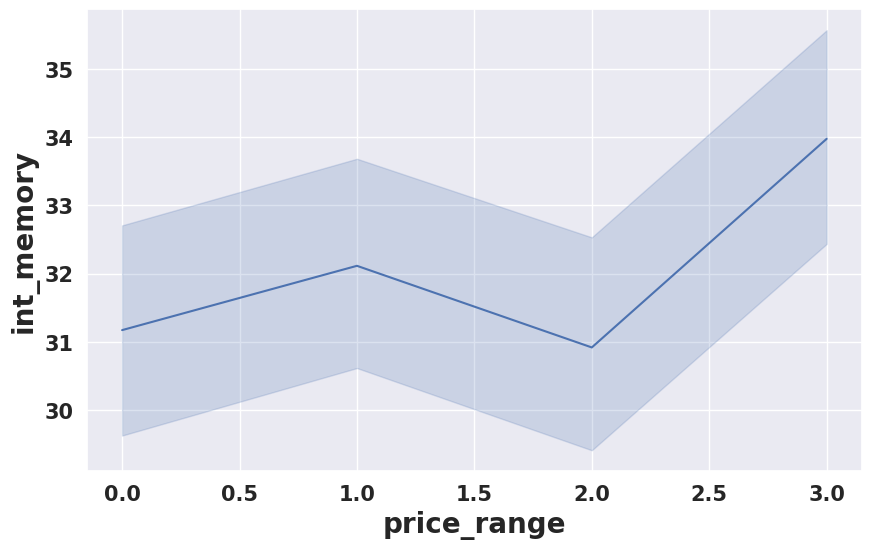

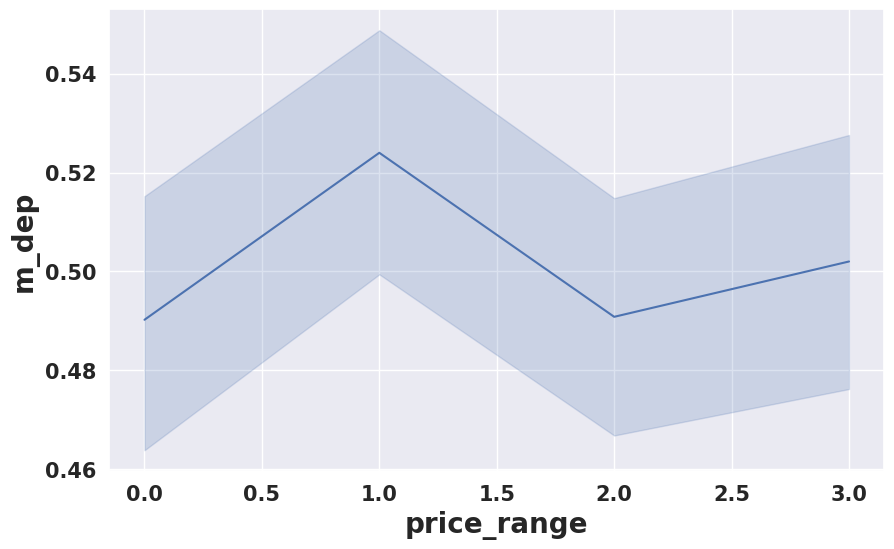

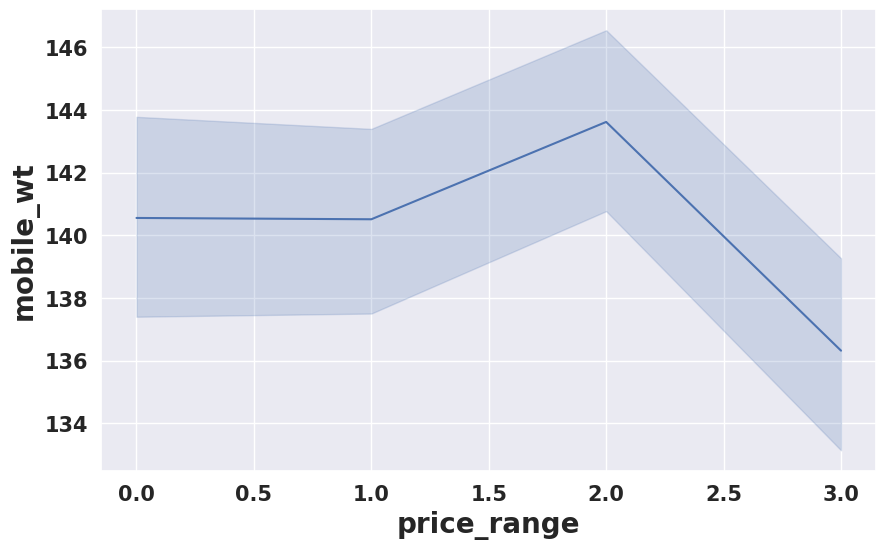

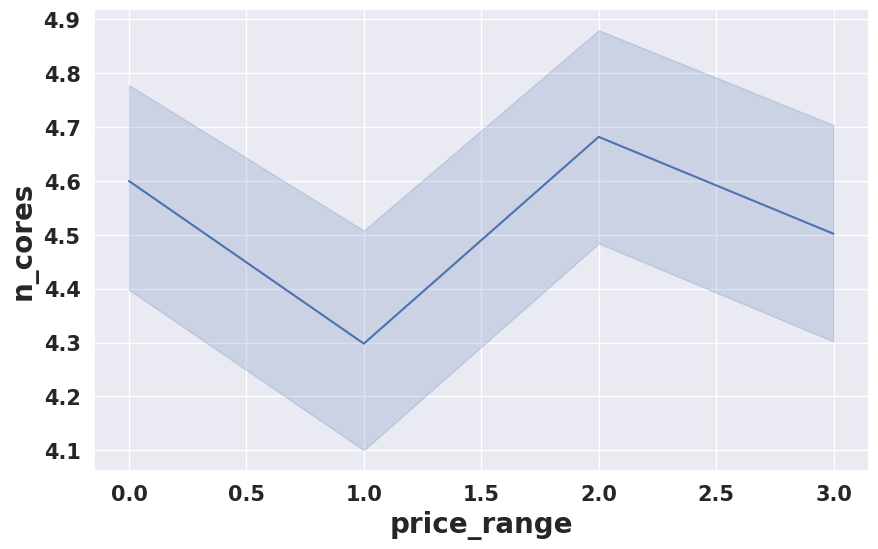

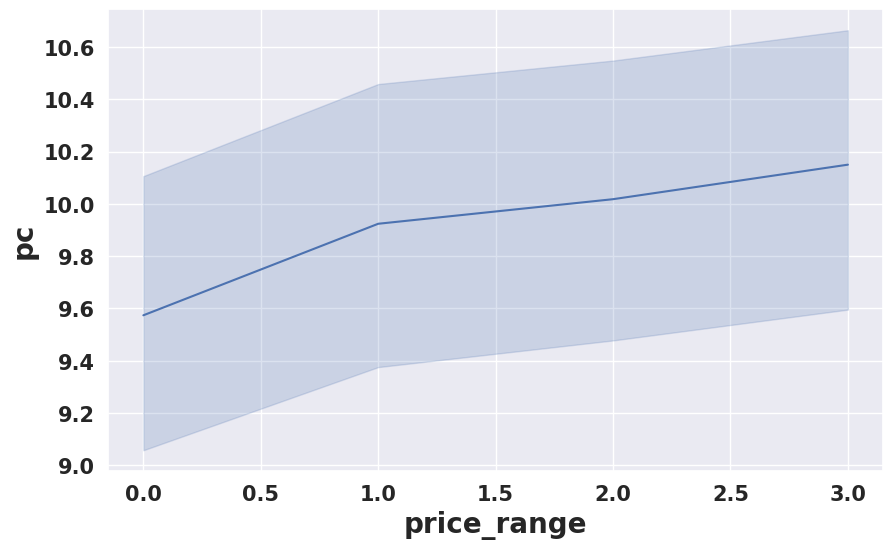

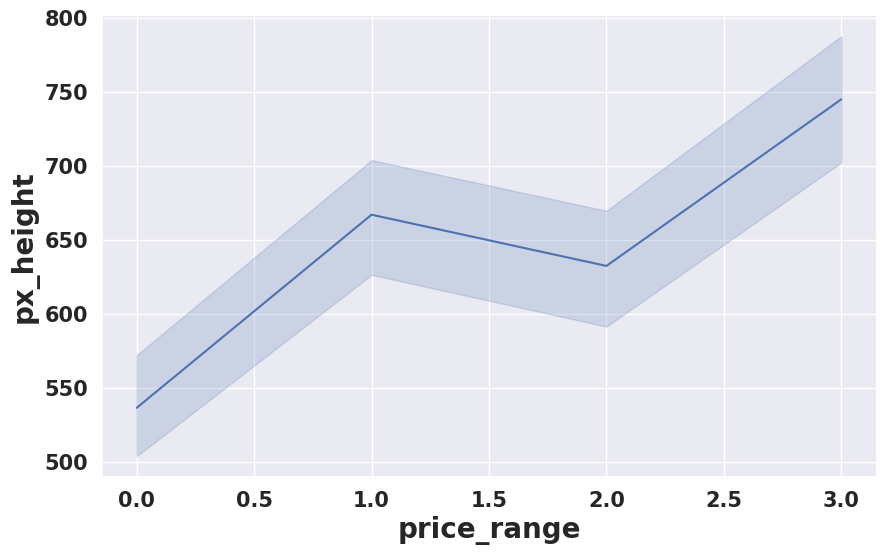

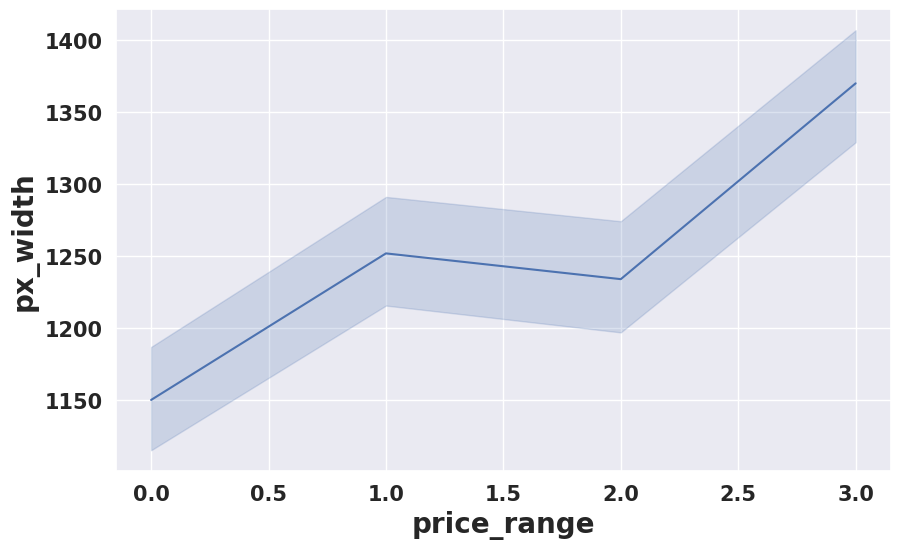

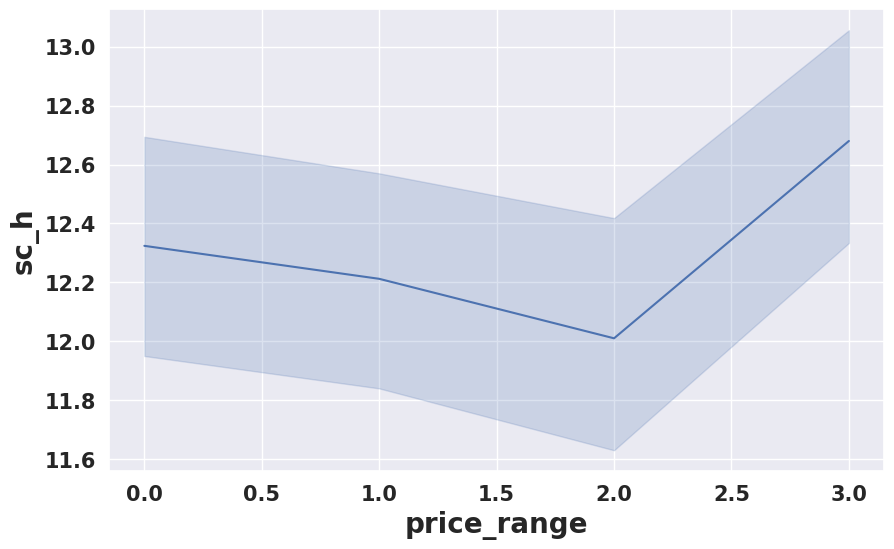

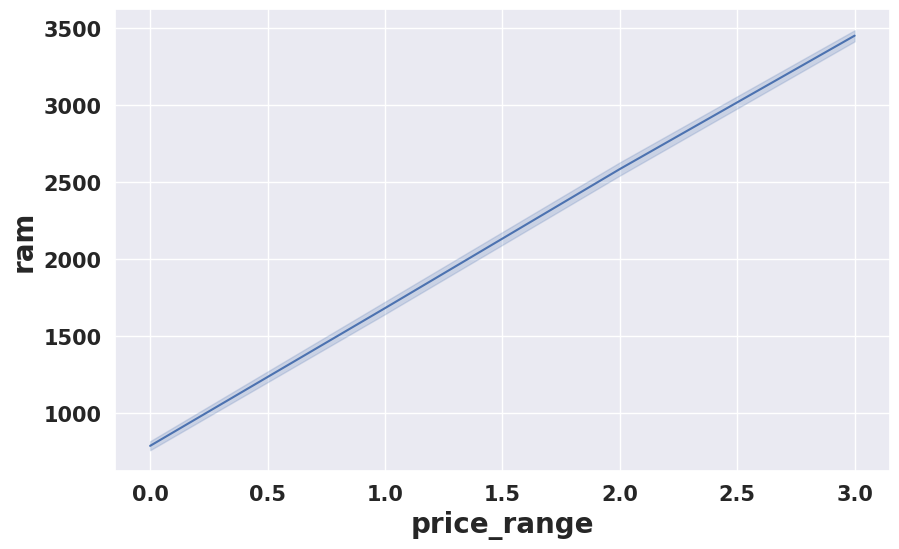

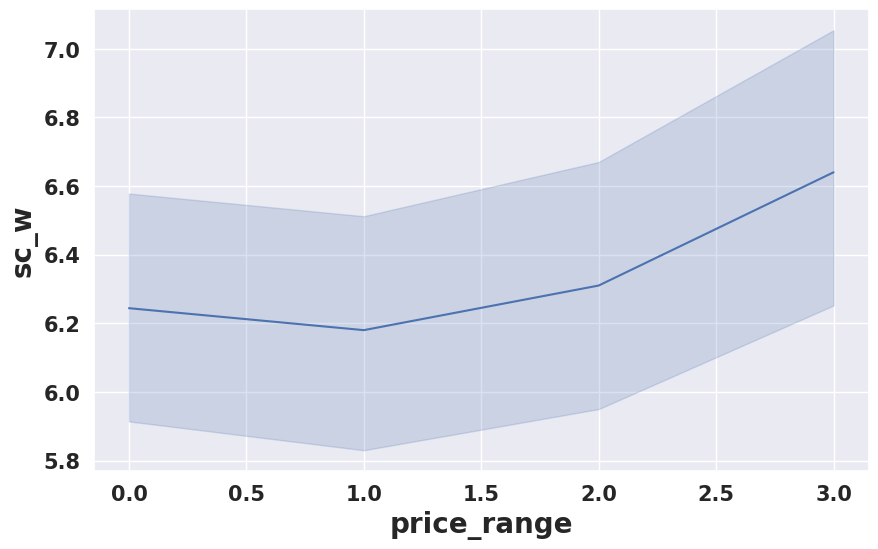

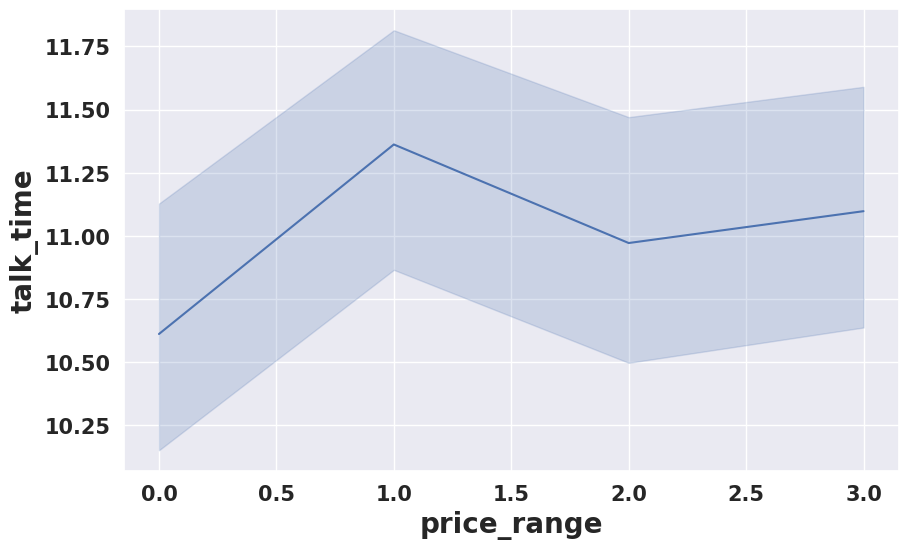

In [ ]:
list_1=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','sc_h','ram','sc_w','talk_time']
# plotting boXplot and distribution
counter=1
for var in list_1:
    plt.figure(figsize=(10,6))

    sns.lineplot(x=df_main['price_range'],y=df_main[var])


### **Observations**
* ***For class 1 and class2 battery power range is almost similar. As battery power increases price also increases whcih is quite obivious.***
* ***Mobiles in very high price range(Class 3) has less weight compared to other classes.That means as weight of mobiles decrease price increases.***
* ***Mobiles having max screen  height and width falls in very high price category. We can see in linechart of sc_width and sc_height from class 2 screen width and hieght starts increasing with price. Similar case is with px_height and px_width. As resolution of screen increases the price also increases***
***RAM has clear relationship with price range we saw that in correlation matrix also.***

# Mobiles with both 3G and 4G.

In [ ]:
# Mobiles have both 3G and 4G specifications.
three_g_and_4g_df=df_main[(df_main['three_g']==1) & (df_main['four_g']==1)]

In [ ]:
three_g_and_4g_df['price_range'].value_counts()

3.0    275
1.0    262
0.0    259
2.0    247
Name: price_range, dtype: int64

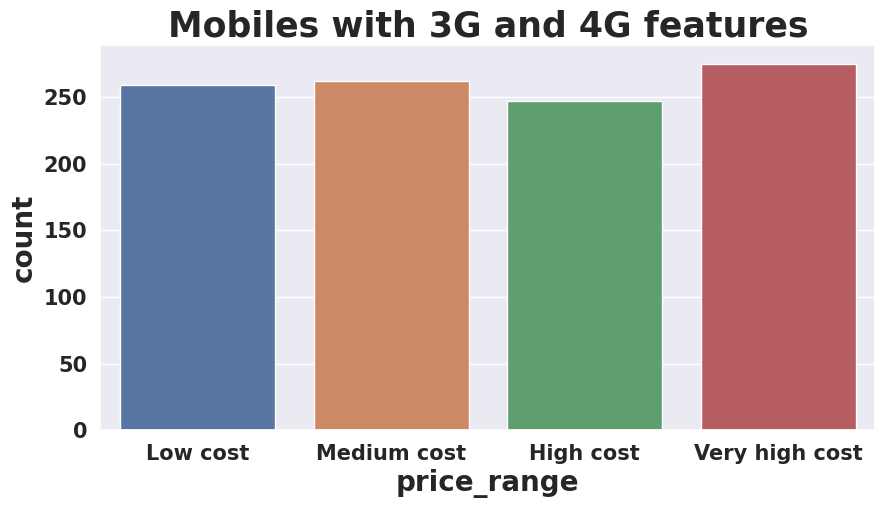

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=three_g_and_4g_df, x='price_range')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Low cost', 'Medium cost', 'High cost', 'Very high cost'])
plt.title("Mobiles with 3G and 4G features")
plt.show()

* As we can see from low cost to very high cost mobiles have both features.

In [ ]:
three_g_df=df_main[(df_main['three_g']==1) & (df_main['four_g']!=1)]

In [ ]:
three_g_df

battery_power  blue  clock_speed  dual_sim   fc  four_g  int_memory  \
3             615.0   1.0          2.5       0.0  0.0     0.0        10.0   
5            1859.0   0.0          0.5       1.0  3.0     0.0        22.0   
7            1954.0   0.0          0.5       1.0  0.0     0.0        24.0   
8            1445.0   1.0          0.5       0.0  0.0     0.0        53.0   
12           1815.0   0.0          2.8       0.0  2.0     0.0        33.0   
...             ...   ...          ...       ...  ...     ...         ...   
1985         1829.0   1.0          2.1       0.0  8.0     0.0        59.0   
1992          674.0   1.0          2.9       1.0  1.0     0.0        21.0   
1993         1467.0   1.0          0.5       0.0  0.0     0.0        18.0   
1994          858.0   0.0          2.2       0.0  1.0     0.0        50.0   
1996         1965.0   1.0          2.6       1.0  0.0     0.0        39.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
3       0.8      131.0      6.0  ...     1216.0    1786.0  2769.0  16.0   8.0   
5       0.7      164.0      1.0  ...     1004.0    1654.0  1067.0  17.0   1.0   
7       0.8      187.0      4.0  ...      512.0    1149.0   700.0  16.0   3.0   
8       0.7      174.0      7.0  ...      386.0     836.0  1099.0  17.0   1.0   
12      0.6      159.0      4.0  ...      607.0     748.0  1482.0  18.0   3.0   
...     ...        ...      ...  ...        ...       ...     ...   ...   ...   
1985    0.1       91.0      5.0  ...     1457.0    1919.0  3142.0  16.0   6.0   
1992    0.2      198.0      3.0  ...      576.0    1809.0  1180.0   6.0   3.0   
1993    0.6      122.0      5.0  ...      888.0    1099.0  3962.0  15.0  11.0   
1994    0.1       84.0      1.0  ...      528.0    1416.0  3978.0  17.0  16.0   
1996    0.2      187.0      4.0  ...      915.0    1965.0  2032.0  11.0  10.0   

      talk_time  three_g  touch_screen  wifi  price_range  
3          11.0      1.0           0.0   0.0          2.0  
5          10.0      1.0           0.0   0.0          1.0  
7           5.0      1.0           1.0   1.0          0.0  
8          20.0      1.0           0.0   0.0          0.0  
12          2.0      1.0           0.0   0.0          1.0  
...         ...      ...           ...   ...          ...  
1985        5.0      1.0           1.0   1.0          3.0  
1992        4.0      1.0           1.0   1.0          0.0  
1993        5.0      1.0           1.0   1.0          3.0  
1994        3.0      1.0           1.0   0.0          3.0  
1996       16.0      1.0           1.0   1.0          2.0  

[480 rows x 21 columns]

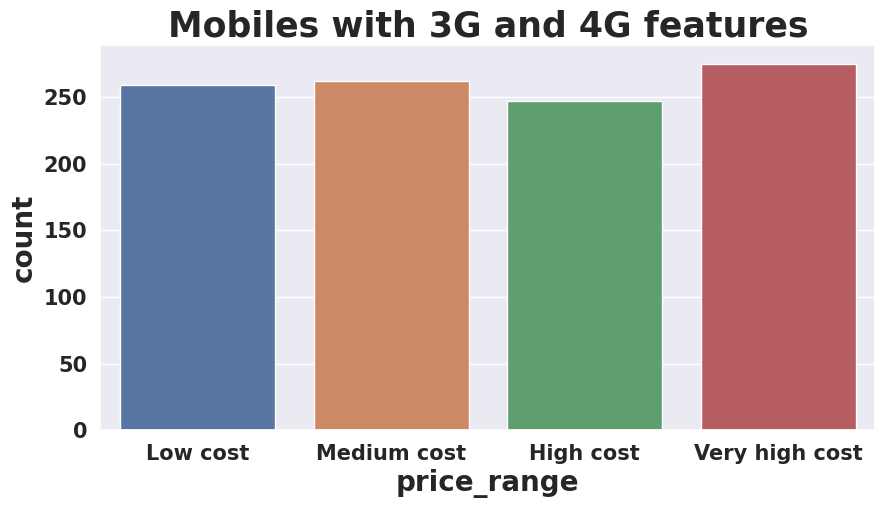

In [ ]:
#plt.figure(figsize=(10,5))
#sns.countplot(three_g_df['price_range'])
#plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
#plt.title("Mobiles with only 3G  features ")
#plt.show()
plt.figure(figsize=(10, 5))
sns.countplot(data=three_g_and_4g_df, x='price_range')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Low cost', 'Medium cost', 'High cost', 'Very high cost'])
plt.title("Mobiles with 3G and 4G features")
plt.show()

Observations:
* Mobiles which has very high cost are very less likely to have 3G.
* There are more chances that high cost mobile will have 3G in it.

#Mobiles not having  3G and 4G.

In [ ]:
No_3g_4G_df=df_main[(df_main['three_g']!=1) & (df_main['four_g']!=1)]

In [ ]:
No_3g_4G_df

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0             842.0   0.0          2.2       0.0   1.0     0.0         7.0   
10            769.0   1.0          2.9       1.0   0.0     0.0         9.0   
19            682.0   1.0          0.5       0.0   4.0     0.0        19.0   
22           1949.0   0.0          2.6       1.0   4.0     0.0        47.0   
30           1579.0   1.0          0.5       1.0   0.0     0.0         5.0   
...             ...   ...          ...       ...   ...     ...         ...   
1981         1454.0   0.0          2.6       0.0   8.0     0.0         6.0   
1982         1784.0   0.0          1.6       0.0   4.0     0.0        41.0   
1983         1262.0   0.0          1.8       1.0  12.0     0.0        34.0   
1988         1547.0   1.0          2.9       0.0   2.0     0.0        57.0   
1989          586.0   0.0          2.8       0.0   2.0     0.0        15.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0       0.6      188.0      2.0  ...       20.0     756.0  2549.0   9.0   7.0   
10      0.1      182.0      5.0  ...      248.0     874.0  3946.0   5.0   2.0   
19      1.0      121.0      4.0  ...      902.0    1064.0  2337.0  11.0   1.0   
22      0.3      199.0      4.0  ...      407.0     822.0  1433.0  11.0   5.0   
30      0.2       88.0      7.0  ...     1358.0    1739.0  3532.0  17.0  11.0   
...     ...        ...      ...  ...        ...       ...     ...   ...   ...   
1981    0.4      199.0      3.0  ...      698.0    1018.0  1300.0  10.0   9.0   
1982    0.4      164.0      6.0  ...      610.0    1437.0  2313.0  14.0   1.0   
1983    0.1      149.0      5.0  ...      223.0     737.0  3248.0  13.0   3.0   
1988    0.4      114.0      1.0  ...      347.0     957.0  1620.0   9.0   2.0   
1989    0.2       83.0      3.0  ...      241.0     854.0  2592.0  12.0   8.0   

      talk_time  three_g  touch_screen  wifi  price_range  
0          19.0      0.0           0.0   1.0          1.0  
10          7.0      0.0           0.0   0.0          3.0  
19         18.0      0.0           1.0   1.0          1.0  
22         20.0      0.0           0.0   1.0          1.0  
30         12.0      0.0           0.0   1.0          3.0  
...         ...      ...           ...   ...          ...  
1981        2.0      0.0           0.0   1.0          1.0  
1982       11.0      0.0           1.0   0.0          2.0  
1983        4.0      0.0           1.0   1.0          2.0  
1988       19.0      0.0           1.0   1.0          1.0  
1989        3.0      0.0           0.0   0.0          1.0  

[477 rows x 21 columns]

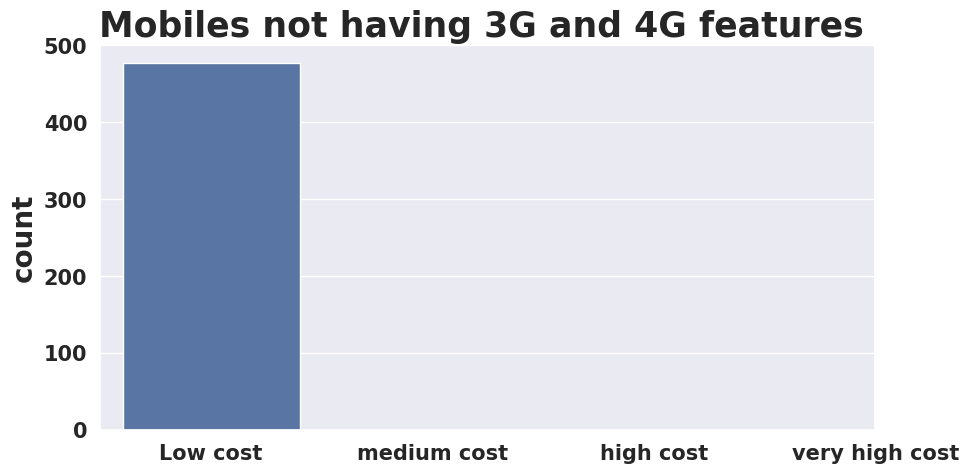

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(No_3g_4G_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles not having 3G and 4G features ")
plt.show()

* Its very obvious that low cost mobiles will not have 3G and 4G.
* Mobiles with very high cost may have 5G. As we know technologies are changes everytime.

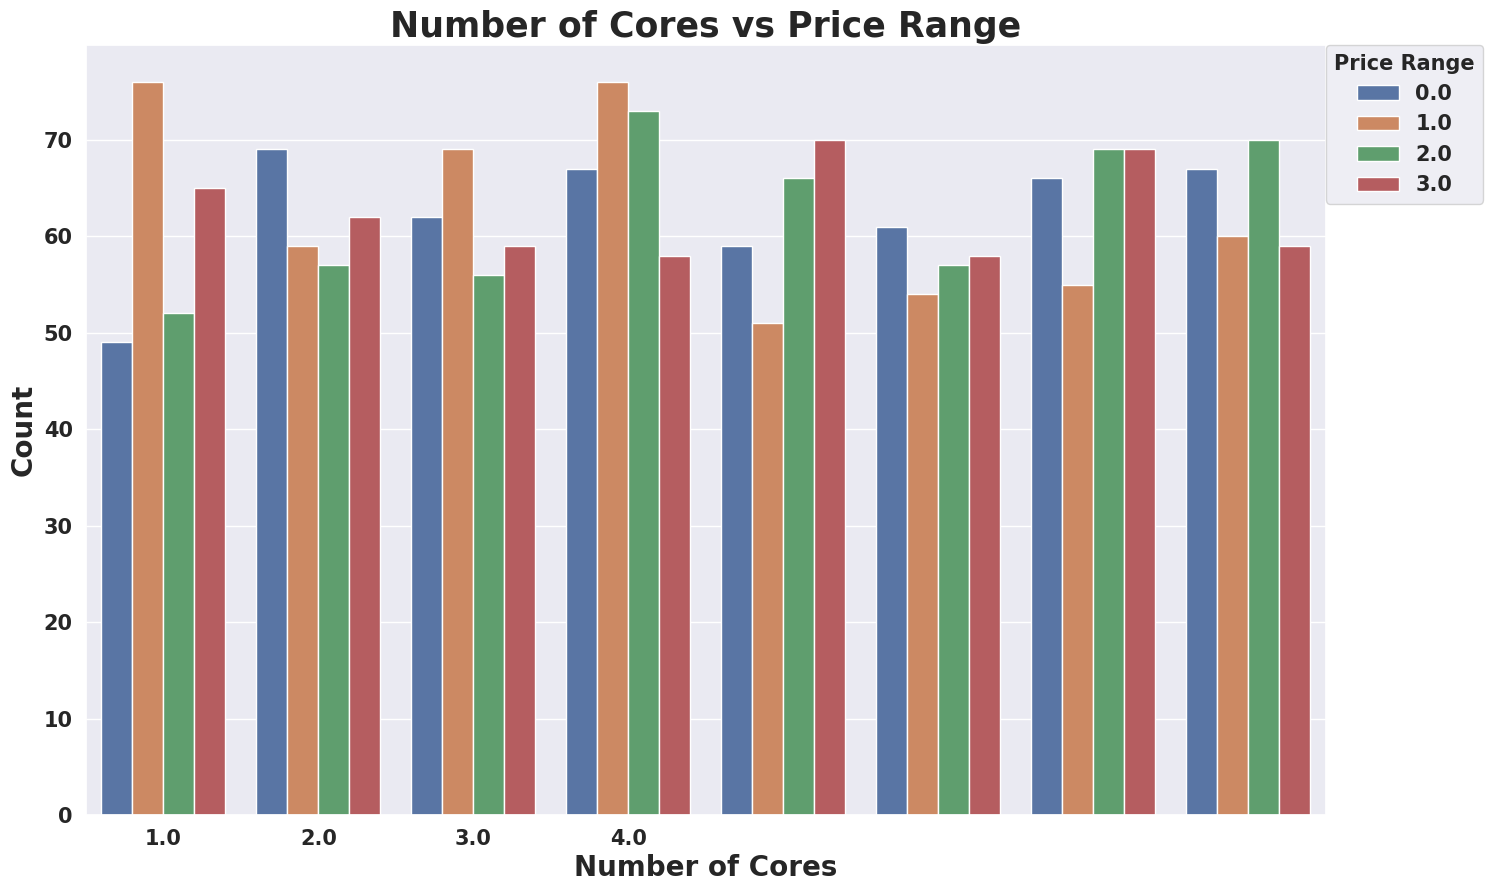

In [ ]:
plt.figure(figsize=(16, 10))
sns.countplot(data=df_main, x='n_cores', hue='price_range')
plt.xticks(ticks=[0, 1, 2, 3])
plt.xlabel('Number of Cores')
plt.ylabel('Count')
plt.title('Number of Cores vs Price Range')
plt.legend(title='Price Range', bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.show()

Observations:
* Price range 0 has majority of phones with 2 core processors
* Price range 1 has majority of phones with 1 and 4 core processors
* Price range 2 has majority of phones with 4 core processors
* Price range 3 has majority of phones with 5 and 7 core processors

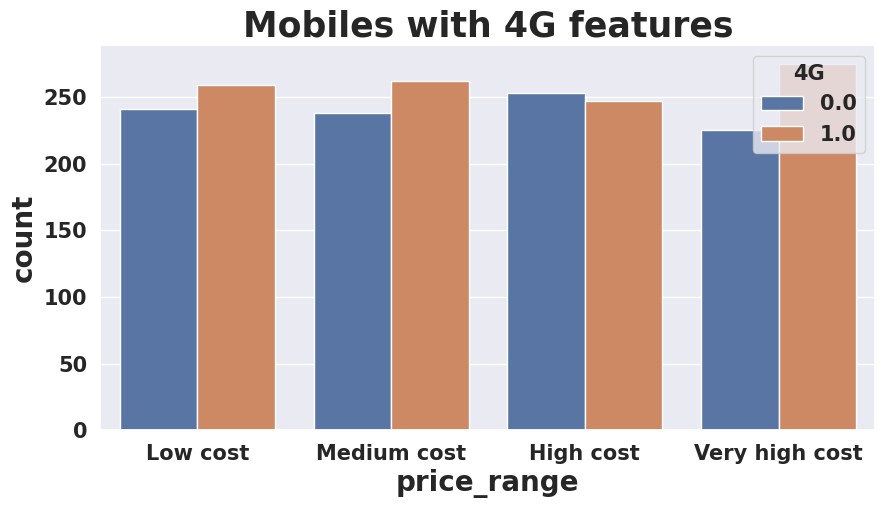

In [ ]:

#plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
#plt.title("Mobiles with 4G features ")
#plt.legend(loc='best')
plt.figure(figsize=(10, 5))
sns.countplot(data=df_main, x='price_range', hue='four_g')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Low cost', 'Medium cost', 'High cost', 'Very high cost'])
plt.title("Mobiles with 4G features")
plt.legend(title='4G')
plt.show()

Majority of phones of only price range 2 dont have 4G service.

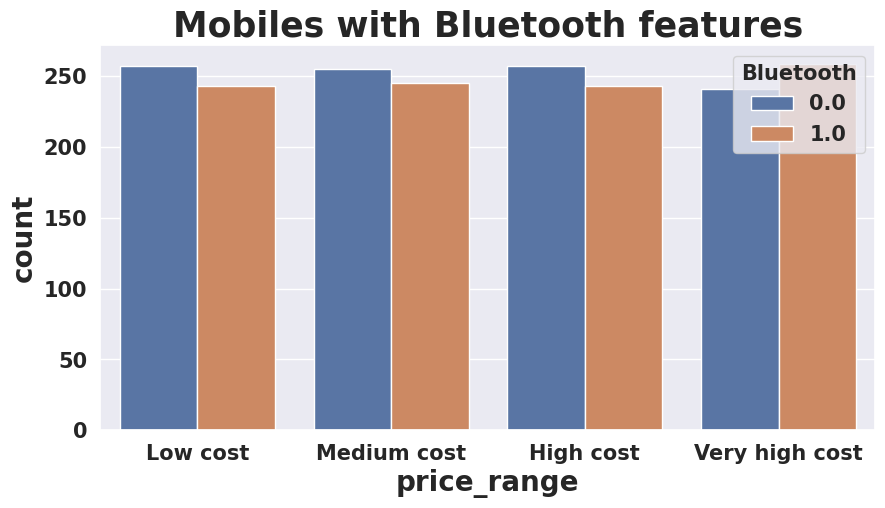

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_main, x='price_range', hue='blue')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Low cost', 'Medium cost', 'High cost', 'Very high cost'])
plt.title("Mobiles with Bluetooth features")
plt.legend(title='Bluetooth', loc='best')
plt.show()

Majority of phones of price range from 0 to 2 dont have bluetooth on other hand price range of 3 have bluetooth service.

# Let's Check the distribution of numerical columns and Outliers.

In [ ]:
df_main.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# numeric col list
numeric_col=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',]

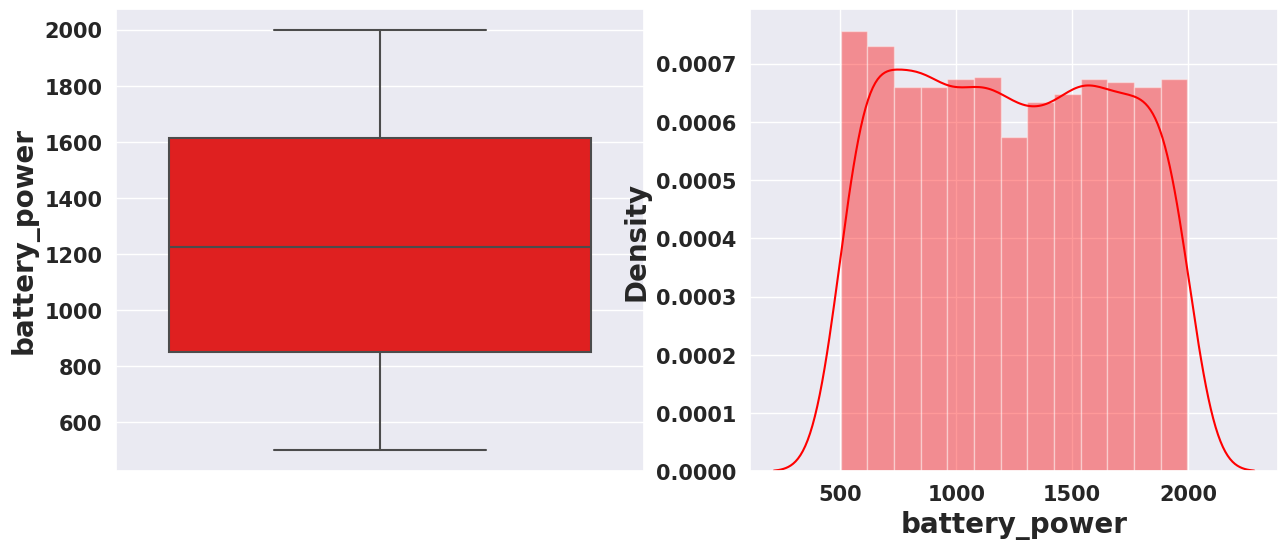

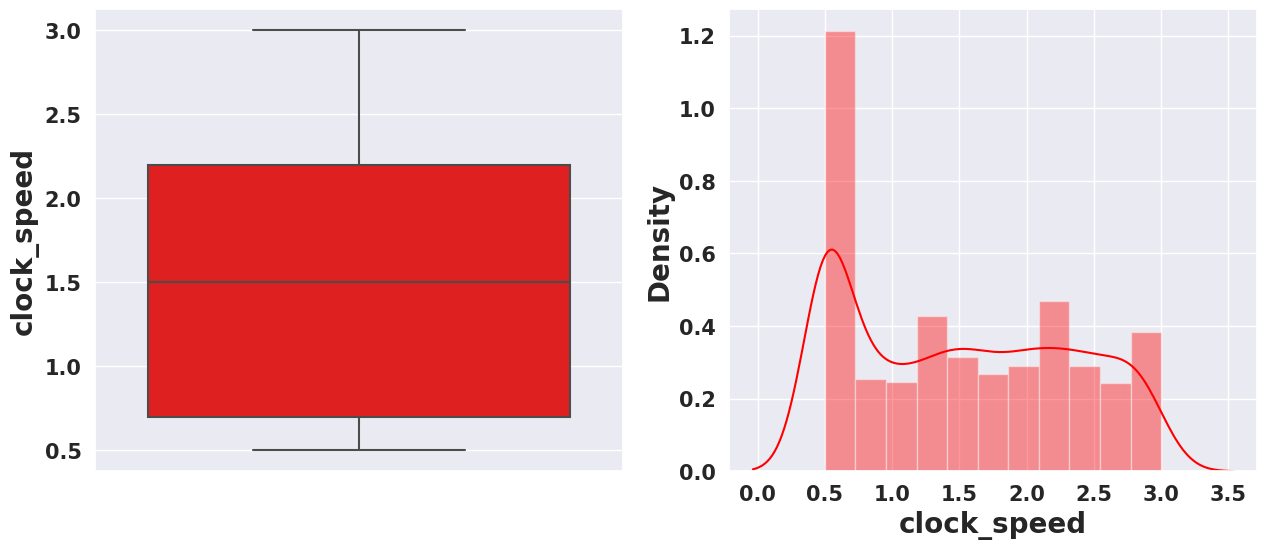

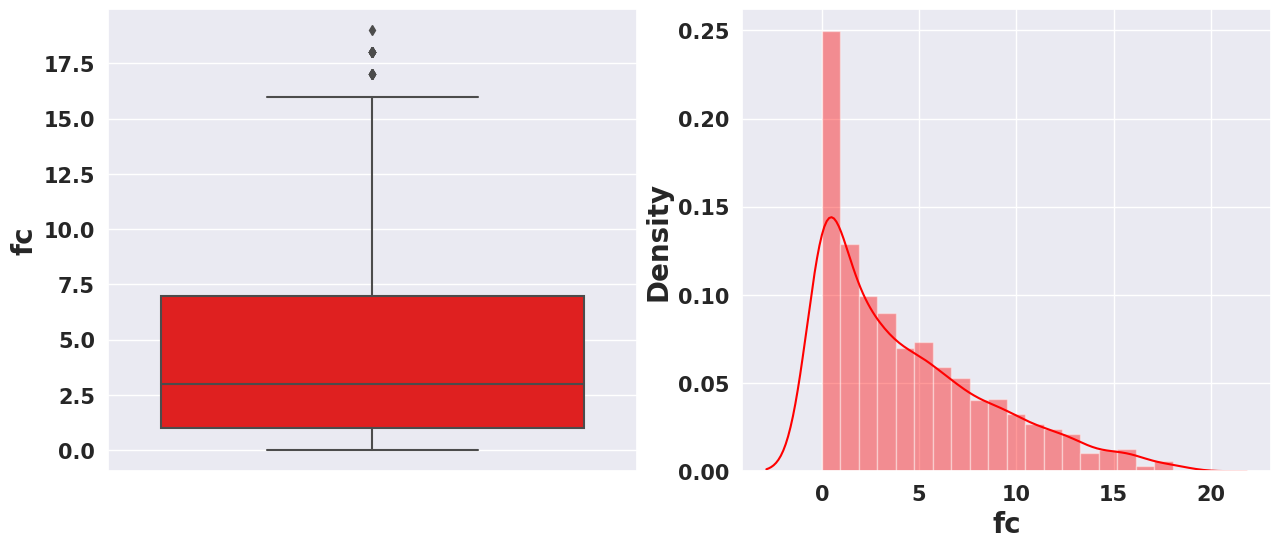

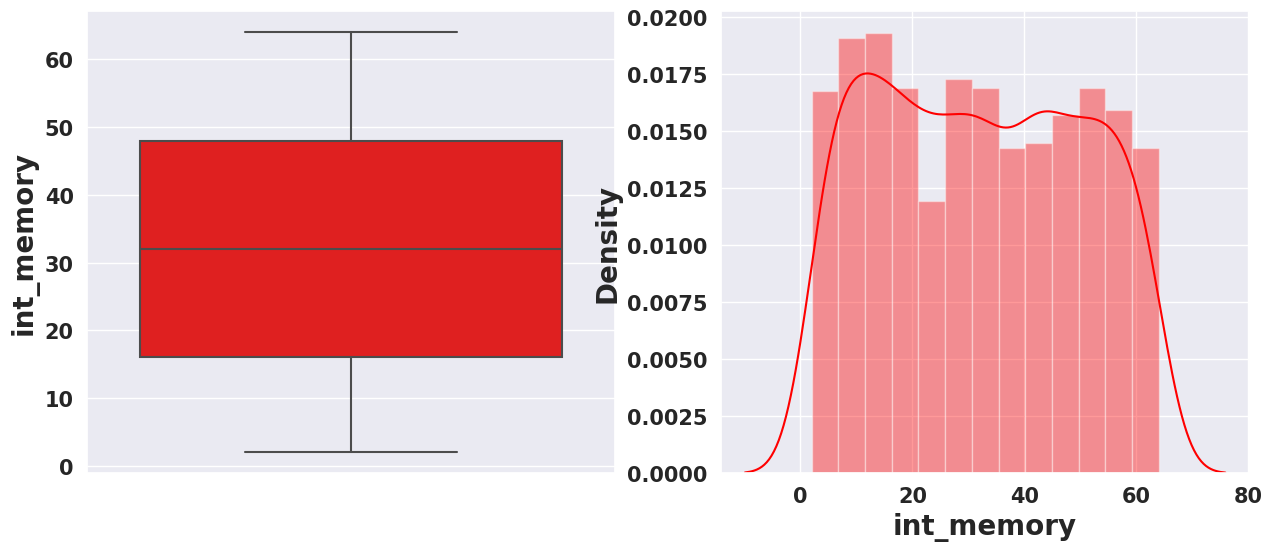

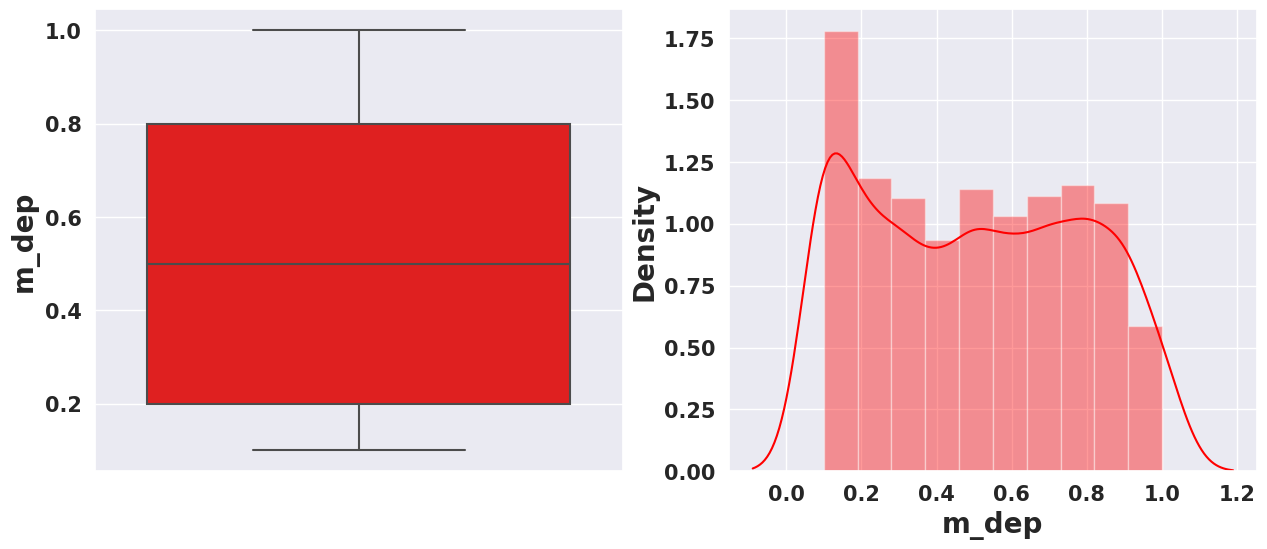

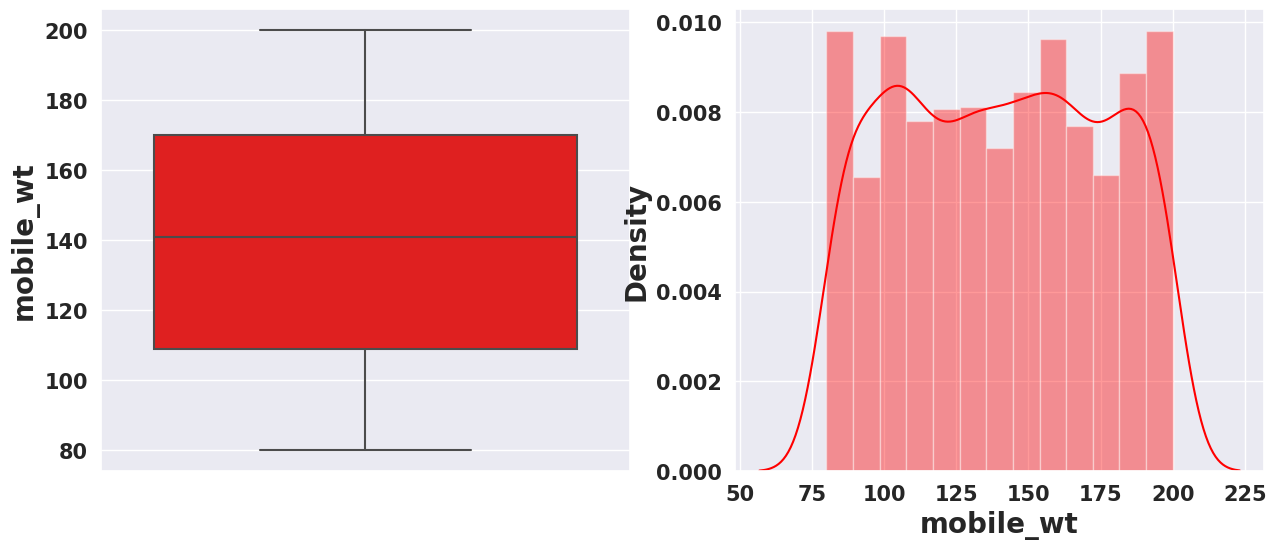

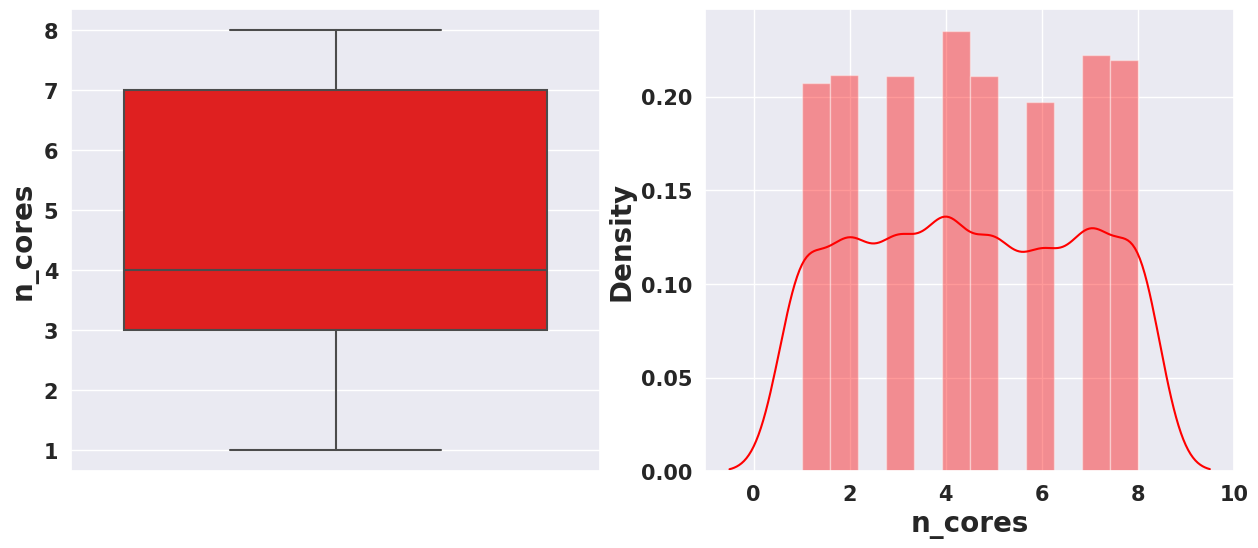

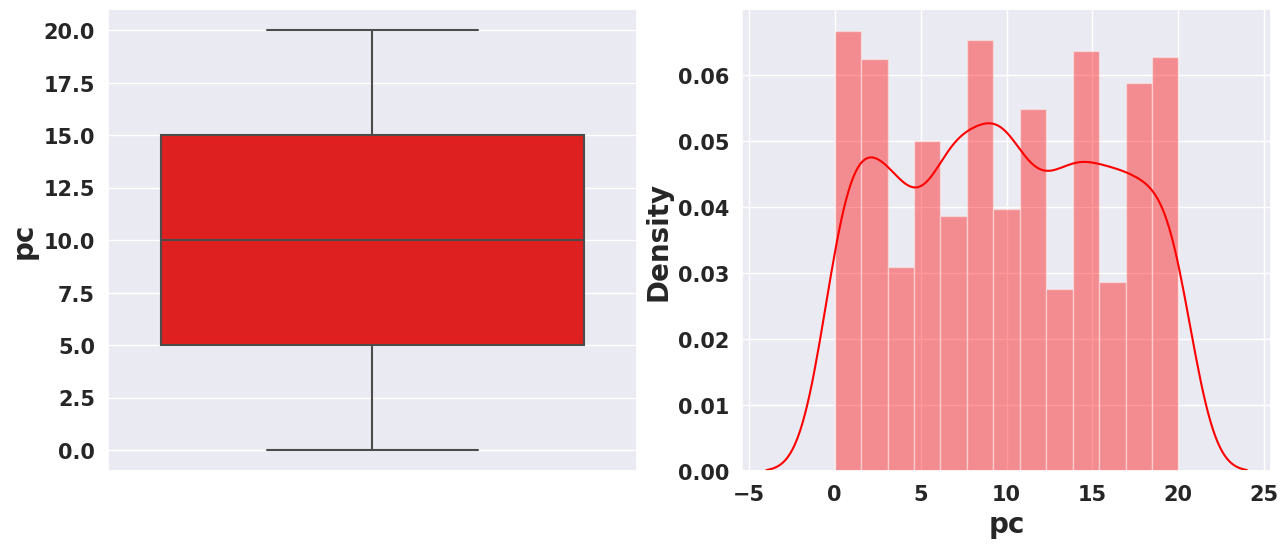

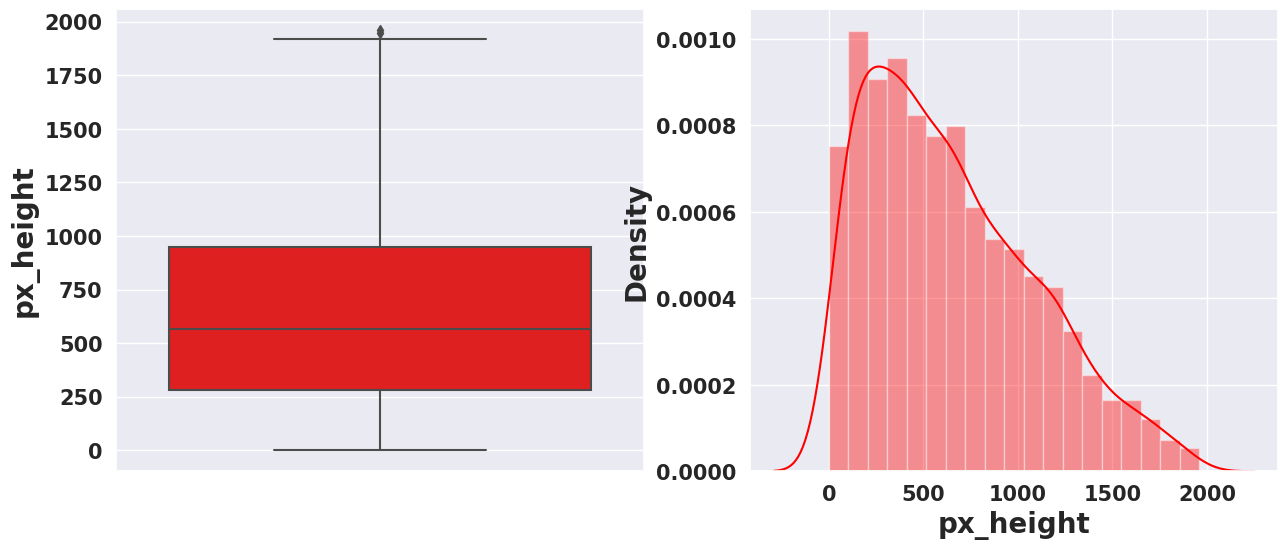

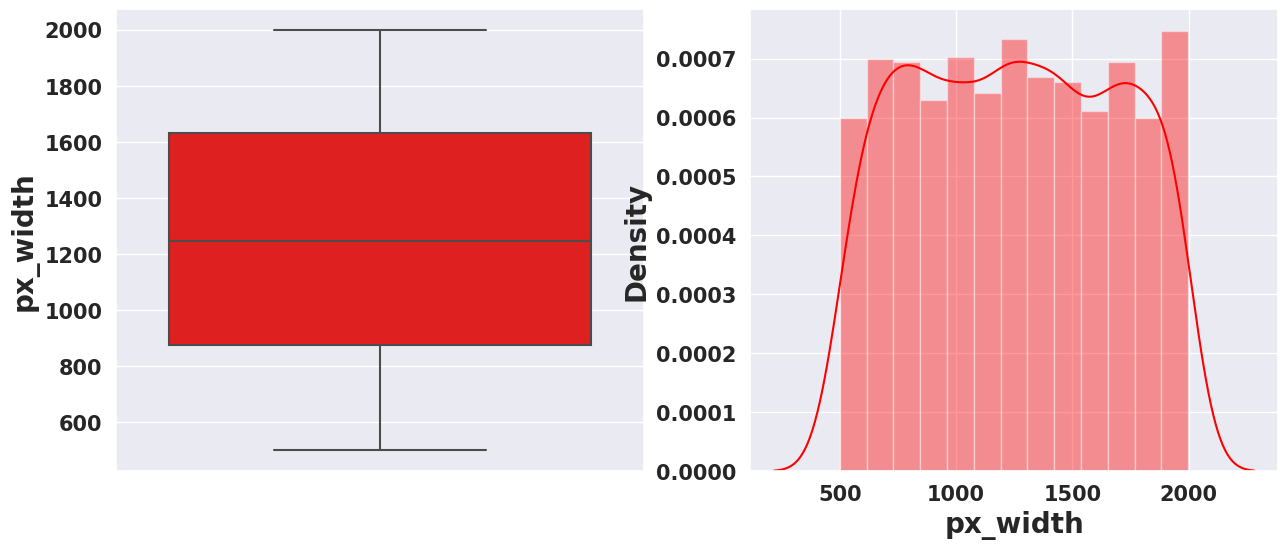

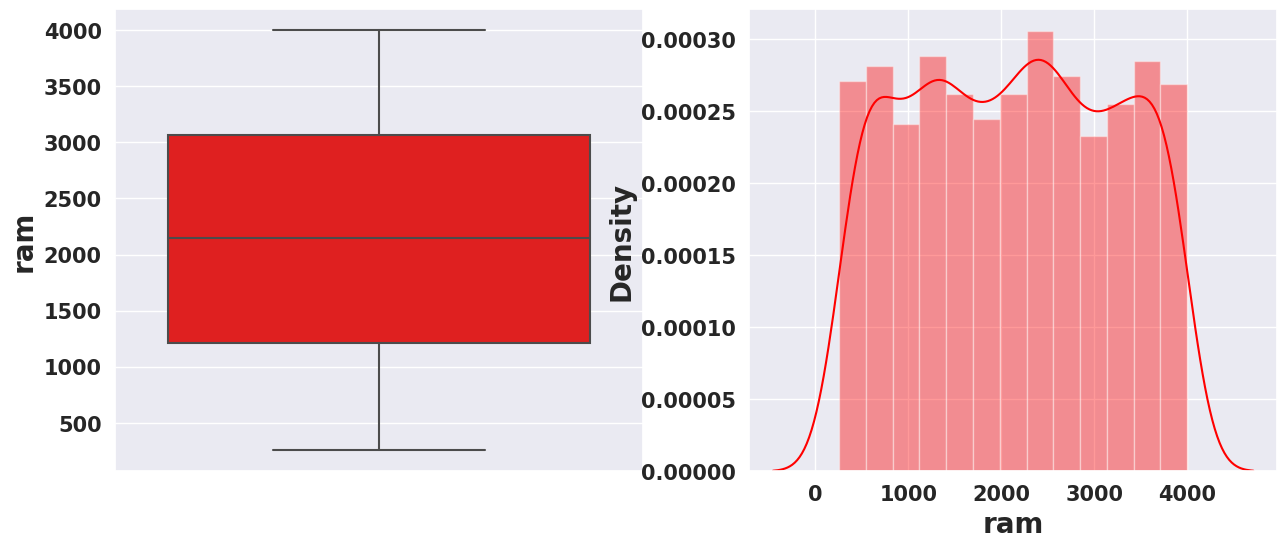

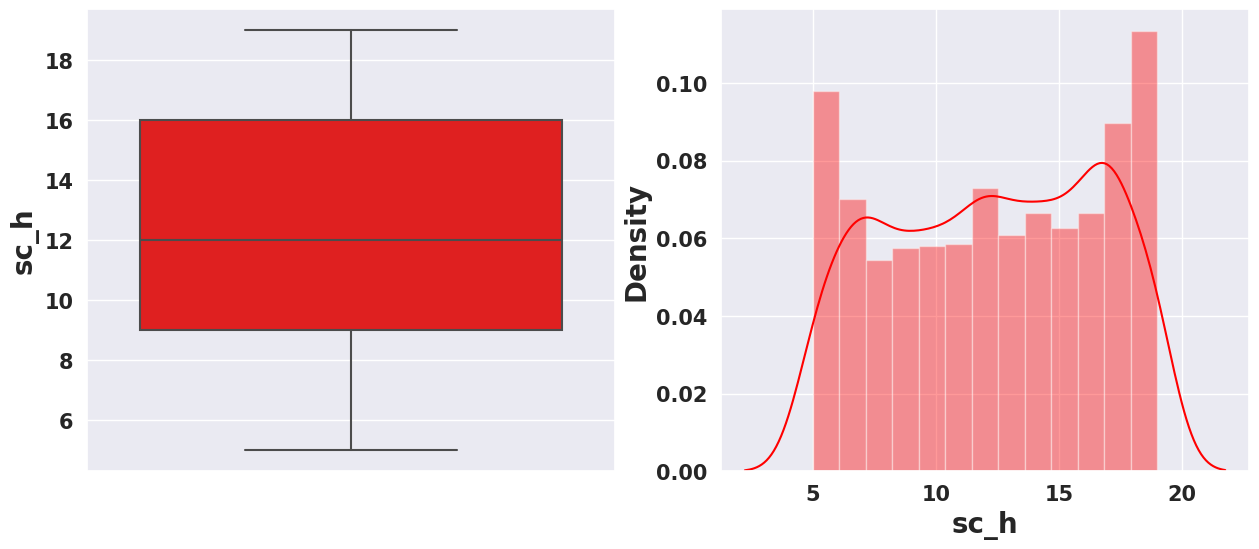

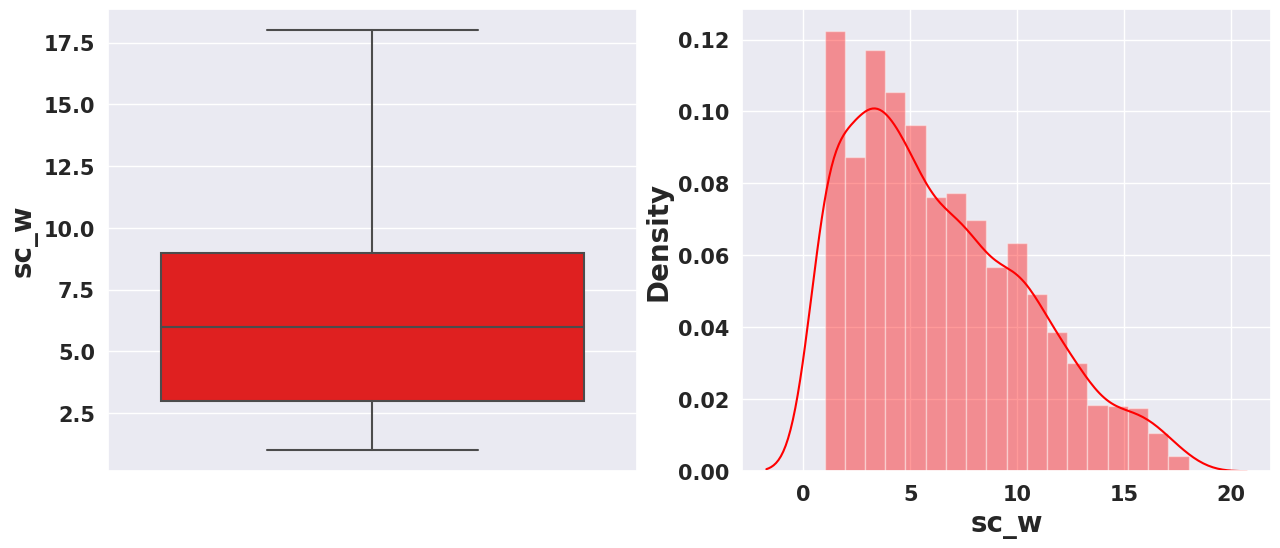

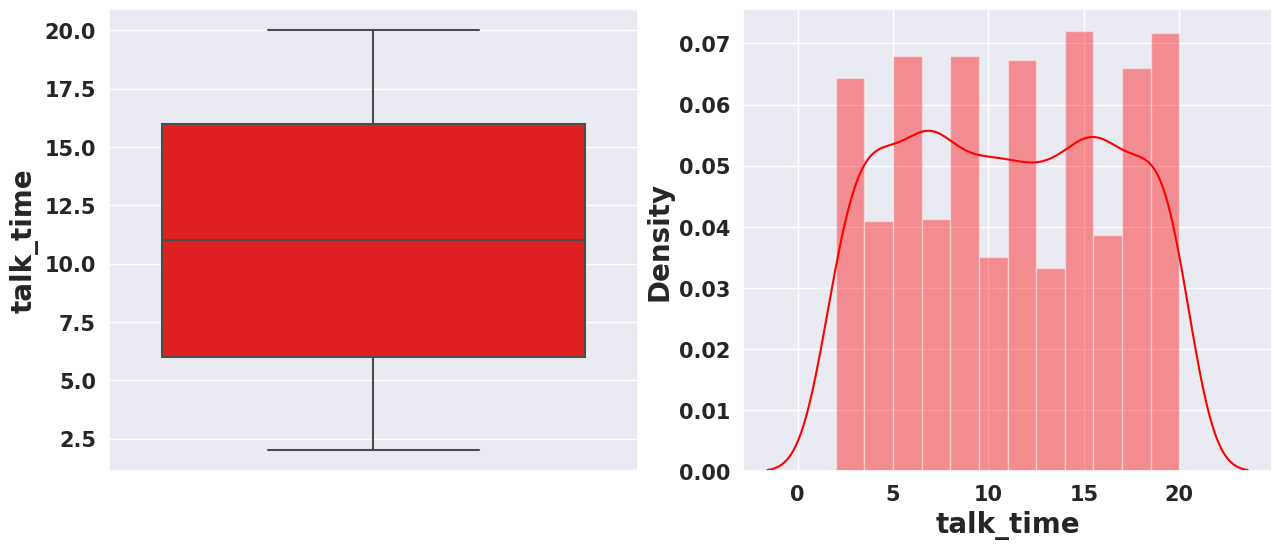

In [ ]:
# plotting boXplot and distribution
for var in numeric_col:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df_main[var],color='red')
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(df_main[var],color='red')

    fig.set_xlabel(var)

    plt.show()

* Data is well distrubted.
* fc and px_height has some outliers.

## **Prepare Data using Ourtlier Treatmet.**


In [ ]:
Q1 = df_main["fc"].quantile(0.25)
Q3 = df_main['fc'].quantile(0.991)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.
df_main = df_main[(df_main['fc'] <= Q3)]

In [ ]:

Q1 = df_main["px_height"].quantile(0.25)
Q3 = df_main['px_height'].quantile(0.991)
IQR = Q3-Q1
# Outliers are present after Quartile 3. so we will take datapoints before Q3.
df_main = df_main[(df_main['px_height'] <= Q3)]

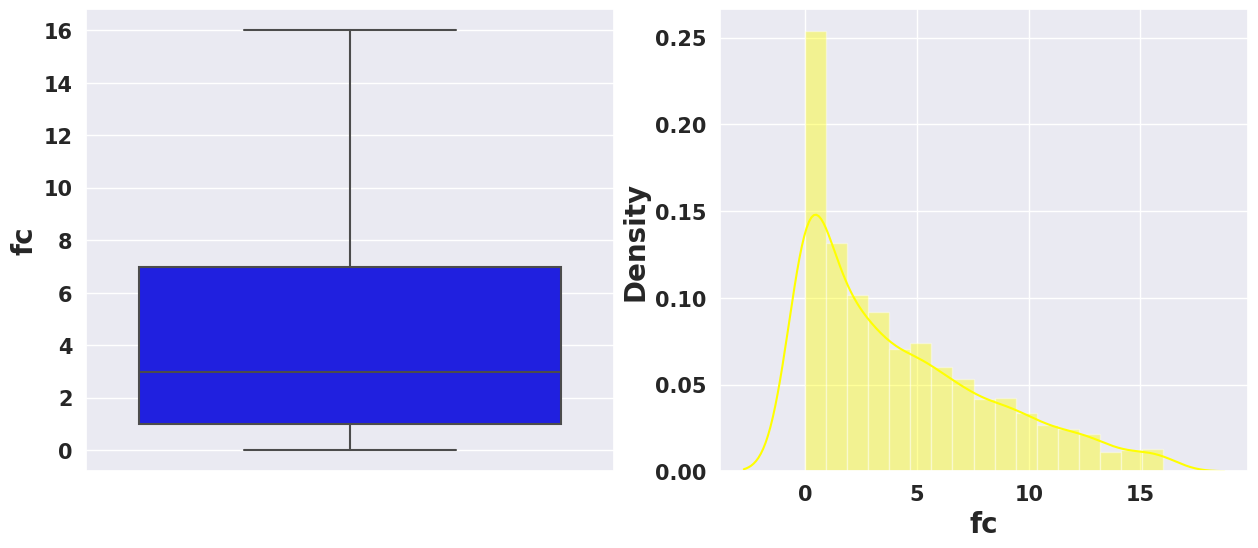

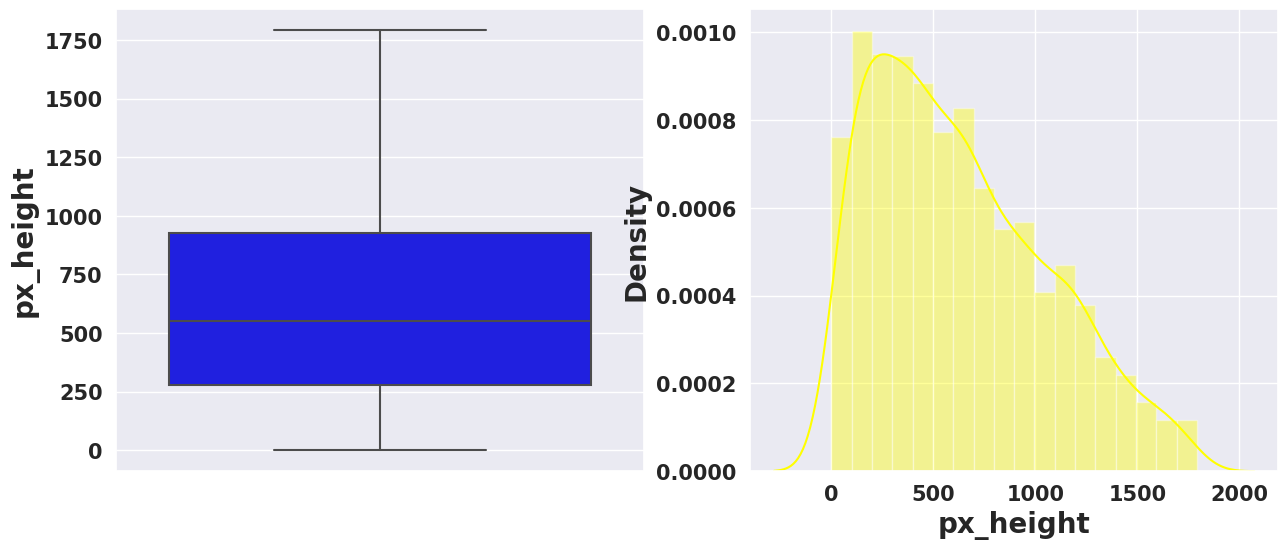

In [ ]:
# Visualising whether oultliers are removed or not.
for var in ['fc','px_height']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df_main[var],color='blue')
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(df_main[var],color='yellow')

    fig.set_xlabel(var)

    plt.show()

Thus we can see in box plot no oultiers are present.

In [ ]:
df_main.shape

(1964, 21)

#So, We can go for further process.

In [ ]:
# create copy of mobile_data
mobile_data_df=df_main.copy()

# Feature Selection

In [ ]:
# checking newly created column.
df_main.head()

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0          842.0   0.0          2.2       0.0   1.0     0.0         7.0   
1         1021.0   1.0          0.5       1.0   0.0     1.0        53.0   
2          563.0   1.0          0.5       1.0   2.0     1.0        41.0   
3          615.0   1.0          2.5       0.0   0.0     0.0        10.0   
4         1821.0   1.0          1.2       0.0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0    0.6      188.0      2.0  ...       20.0     756.0  2549.0   9.0   7.0   
1    0.7      136.0      3.0  ...      905.0    1988.0  2631.0  17.0   3.0   
2    0.9      145.0      5.0  ...     1263.0    1716.0  2603.0  11.0   2.0   
3    0.8      131.0      6.0  ...     1216.0    1786.0  2769.0  16.0   8.0   
4    0.6      141.0      2.0  ...     1208.0    1212.0  1411.0   8.0   2.0   

   talk_time  three_g  touch_screen  wifi  price_range  
0       19.0      0.0           0.0   1.0          1.0  
1        7.0      1.0           1.0   0.0          2.0  
2        9.0      1.0           1.0   0.0          2.0  
3       11.0      1.0           0.0   0.0          2.0  
4       15.0      1.0           1.0   0.0          1.0  

[5 rows x 21 columns]

<Axes: >

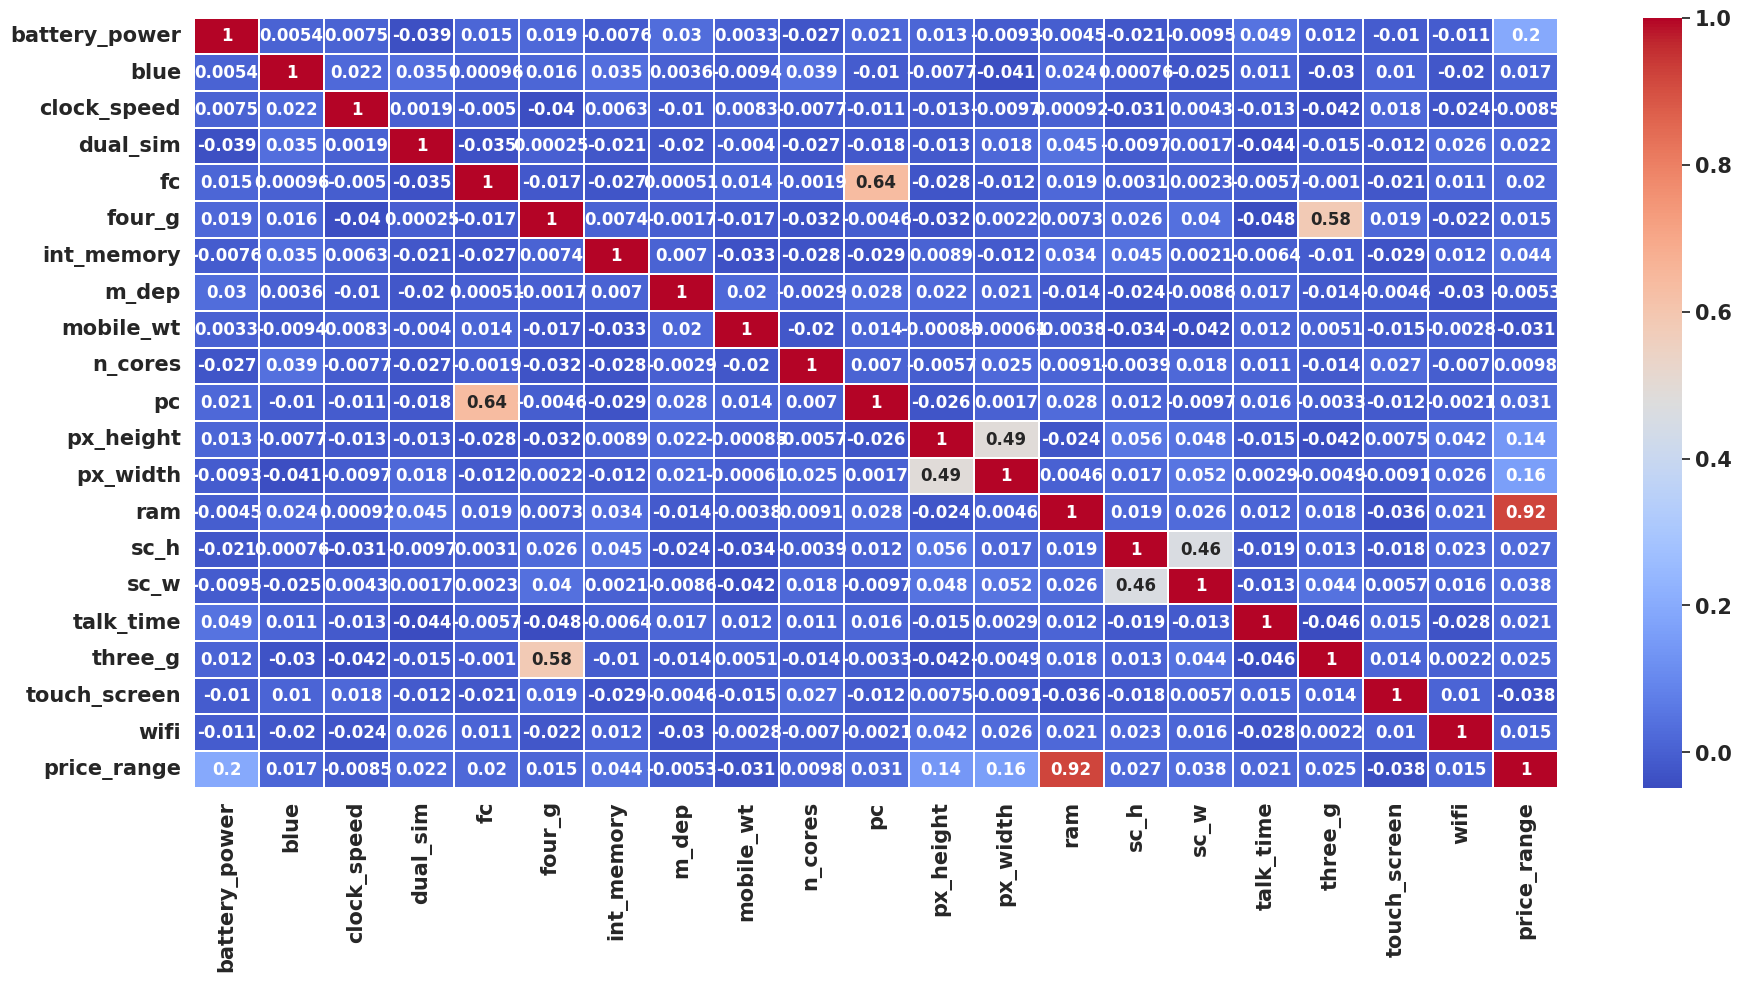

In [ ]:
data_corr= df_main.corr()
plt.figure(figsize=(22,10))

#cmap use for colour palette , linewidths : set the width of the lines that divide the cells,
#annot :helps in annotating the heatmap with values if set to True, otherwise values are not provided , linecolor : helps in setting the color of each line that divides heatmap cells
sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

In [ ]:
# Separating X variables(indpendent variables) and Y(dependent variable) variable.
X=df_main.drop('price_range',axis=1)
y=df_main["price_range"]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
#No we Will select the  top 12 important features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)


In [ ]:
# creating score's and coolumn's dataframe
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
# conacatenating above two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [ ]:
# Check dataframe
featureScores

Specs          Score
0   battery_power   13399.493422
1            blue       0.574942
2     clock_speed       0.801821
3        dual_sim       0.692208
4              fc      10.807547
5          four_g       1.373364
6      int_memory      79.335880
7           m_dep       0.806024
8       mobile_wt      89.225442
9         n_cores       8.051487
10             pc       7.681300
11      px_height   15390.460943
12       px_width    9299.682574
13            ram  915771.566479
14           sc_h      11.939828
15           sc_w      11.601751
16      talk_time      11.272551
17        three_g       0.378475
18   touch_screen       2.357338
19           wifi       0.384518

In [ ]:
# 12 features with highest chi squared statistic
print(featureScores.nlargest(12,'Score'))

            Specs          Score
13            ram  915771.566479
11      px_height   15390.460943
0   battery_power   13399.493422
12       px_width    9299.682574
8       mobile_wt      89.225442
6      int_memory      79.335880
14           sc_h      11.939828
15           sc_w      11.601751
16      talk_time      11.272551
4              fc      10.807547
9         n_cores       8.051487
10             pc       7.681300


In [ ]:
# 12 features with highest chi squared statistic are selected as independent variables.
X=df_main[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_h','talk_time','sc_w','fc','n_cores','pc']]

# dependent varaible
y=df_main['price_range']




# **Predictive Modeling:**
## **Algorithms used for predictive modeling:**
  **1) Decision Tree**

**2) Random Forest classifier**

**3) Gradient Boosting Classifier**

**4) K-nearest Neighbour classifier**

**5) XG Boost Classifier**

**6) Support Vector Machine(SVM)**


**As we know for Decision tree,random forest and enssembles trees do not require Feature scaling as these are Tree based models. So we will be using X_train and X_test which are not scaled.**

**And also for K nearest Neighbors and SVM  we will be usingseX_train_scaled and X_test_scaled. That is we we will use Standardised data. i.e. Scaled data.
As these are distance based Algorithms.**

In [ ]:
# importing all essential libraries.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix



In [ ]:
# splitting the data into Train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1473, 12)
(491, 12)
(1473,)
(491,)


In [ ]:

# Scaling the data.
# creating an object of MinMax Scaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)   # fitting the X_train
X_test_scaled=scaler.transform(X_test)         # transforming X_test

In [ ]:
X_train_scaled

array([[-0.91019637, -1.02077573,  0.98689616, ..., -0.5184728 ,
        -1.13655149,  0.52381817],
       [ 0.04710232, -1.28908581, -1.53141326, ...,  0.45720326,
        -0.6941254 ,  0.35706128],
       [-1.50656139,  0.77106893,  0.46121873, ..., -0.27455378,
        -1.13655149, -0.81023702],
       ...,
       [-0.78561013,  0.71040753,  1.69453887, ..., -1.00631082,
         0.1907268 , -0.97699391],
       [ 0.99890455, -1.35441348,  0.86558599, ...,  1.1889603 ,
         0.63315289,  1.02408887],
       [ 0.17993323, -0.20417986,  0.7307969 , ..., -0.27455378,
         0.63315289, -0.64348012]])

In [ ]:
X_test_scaled

array([[-0.25703468,  0.05946396, -0.24867046, ...,  1.67679832,
         0.1907268 ,  1.35760267],
       [-0.55201093,  2.31793484,  0.4499863 , ..., -1.00631082,
         0.1907268 , -1.14375081],
       [-1.09890789, -1.16309673,  0.81391684, ..., -0.5184728 ,
         1.51800509, -0.81023702],
       ...,
       [-0.24054533,  0.92038932, -1.20118   , ..., -1.00631082,
        -1.13655149, -1.64402151],
       [-0.6830097 , -0.10852148,  1.23850246, ...,  1.67679832,
         0.1907268 ,  0.52381817],
       [ 1.65847877, -0.55881578, -1.58982187, ..., -1.00631082,
         0.1907268 , -1.47726461]])

In [ ]:
# Defining a fucnction for plotting roc curve
def plot_Auc_roc(y_test,pred_prob):
  '''It will take y_test and y predicted probabilities
  as input and will plot the roc curve.'''

  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 4

  for i in range(n_class):
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

  # plotting
  plt.figure(figsize=(12,8))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= ((f'Class 0(Low cost) vs Rest, AUC= {round(auc(fpr[0],tpr[0]),4)}')))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=((f'Class 1(Medium cost) vs Rest, AUC= {round(auc(fpr[1],tpr[1]),4)}')))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=((f'Class 2(High cost) vs Rest, AUC= {round(auc(fpr[2],tpr[2]),4)}')))
  plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=((f'Class 3(Very High cost) vs Rest, AUC= {round(auc(fpr[3],tpr[3]),4)}')))
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC',dpi=300);

In [ ]:
# creating a class list
Class_cat = ['low cost','medium cost', 'high cost', 'very high cost']

# **1)Decision Tree Classifier:**

**Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.**
**So here we will use X_train,X_test,y_test and Y_train which are not scaled.**

***Decision Tree with default hyperparameters:***

In [ ]:
# Creating object of the decision tree.
dtc=DecisionTreeClassifier(random_state=0)


In [ ]:
# fitting/training the train set.
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# Predicting y values of train and test data.
y_train_pred=dtc.predict(X_train)
y_pred=dtc.predict(X_test)

In [ ]:
# Checking train set accuracy.
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# Checking test set accuracy
accuracy_score(y_test,y_pred)

0.8126272912423625

In [ ]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[105,  16,   0,   0],
       [  7,  98,  14,   0],
       [  0,  23,  88,  20],
       [  0,   0,  12, 108]])

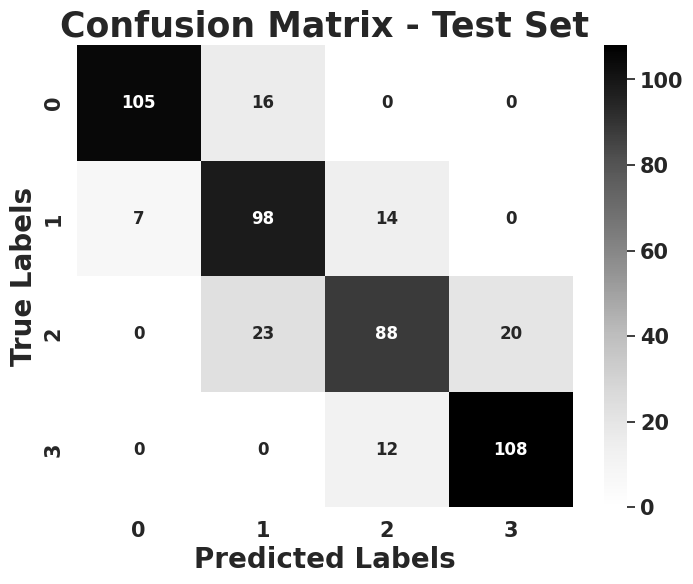

In [ ]:
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Set')
plt.show()


In [ ]:
# Printing classification of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       373
         1.0       1.00      1.00      1.00       373
         2.0       1.00      1.00      1.00       360
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1473
   macro avg       1.00      1.00      1.00      1473
weighted avg       1.00      1.00      1.00      1473



In [ ]:
# printing classification of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90       121
         1.0       0.72      0.82      0.77       119
         2.0       0.77      0.67      0.72       131
         3.0       0.84      0.90      0.87       120

    accuracy                           0.81       491
   macro avg       0.82      0.82      0.81       491
weighted avg       0.82      0.81      0.81       491



## **Observation**

* ***Train set accuracy is 100% and test accuracy is 84%.***
* ***Model is overfitted on train set and did not generalised well.***
* ***We will tune hyperparamters to reduce overfitting and try to imporve the model performance.***

### **Let's tune some hypereparameters of Decsion Tree classifier:**

In [ ]:
# creating an object of classifier.
dtc_= DecisionTreeClassifier(random_state=0)

In [ ]:
# paramter grid values for hyperparameter tunning.
grid_values={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
             'splitter':['best','random'],
             'min_samples_split':[3,5,10],
             'max_features':['auto','sqrt','log2',None]}

In [ ]:
# applying GridSearchCv and fitting the model with it.
dtc_tune=GridSearchCV(dtc_,param_grid=grid_values,cv=5,scoring='accuracy',verbose=3)
dtc_tune.fit(X_train,y_train)   # model fitting.

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.308 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.298 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.332 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.299 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.313 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.281 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.342 total time=   0.0s
[CV 3/5] END criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [ ]:
# getting best parameters for model.
dtc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': None,
 'min_samples_split': 5,
 'splitter': 'random'}

In [ ]:
# getting best estimators
dtc_tune.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=5,
                       random_state=0, splitter='random')

In [ ]:
# using best parameters and training the the data.
dtc_optimal=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)
dtc_optimal.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)

In [ ]:
# predicting y values of train and test set.
y_train_pred=dtc_optimal.predict(X_train)
y_pred=dtc_optimal.predict(X_test)

In [ ]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

0.9769178547182621

In [ ]:
# Checking the accuarcy score of test set.
accuracy_score(y_test,y_pred)

0.8329938900203666

In [ ]:
# getting confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[109,  12,   0,   0],
       [ 14,  94,  11,   0],
       [  0,  17, 101,  13],
       [  0,   0,  15, 105]])

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap='Greys'):
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap=cmap)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix - Test Set')
    plt.xticks(np.arange(len(classes)), classes, rotation='vertical')
    plt.yticks(np.arange(len(classes)), classes)
    plt.tight_layout()
    plt.show()

In [ ]:
# printing classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       373
         1.0       0.97      0.97      0.97       373
         2.0       0.98      0.96      0.97       360
         3.0       0.99      0.98      0.98       367

    accuracy                           0.98      1473
   macro avg       0.98      0.98      0.98      1473
weighted avg       0.98      0.98      0.98      1473



In [ ]:
# printing classification report for test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89       121
         1.0       0.76      0.79      0.78       119
         2.0       0.80      0.77      0.78       131
         3.0       0.89      0.88      0.88       120

    accuracy                           0.83       491
   macro avg       0.83      0.83      0.83       491
weighted avg       0.83      0.83      0.83       491



In [ ]:
# creating a function for plotting the feature importances.
def plot_feature_importance(algo):
  ''' Takes the alogorithm as input and
  plots the feature importance graph'''

  # get importance
  importance = algo.feature_importances_
  feat_importance=pd.DataFrame({'Features':X.columns,'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(10,8))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'])
  plt.title('Feature Importance')

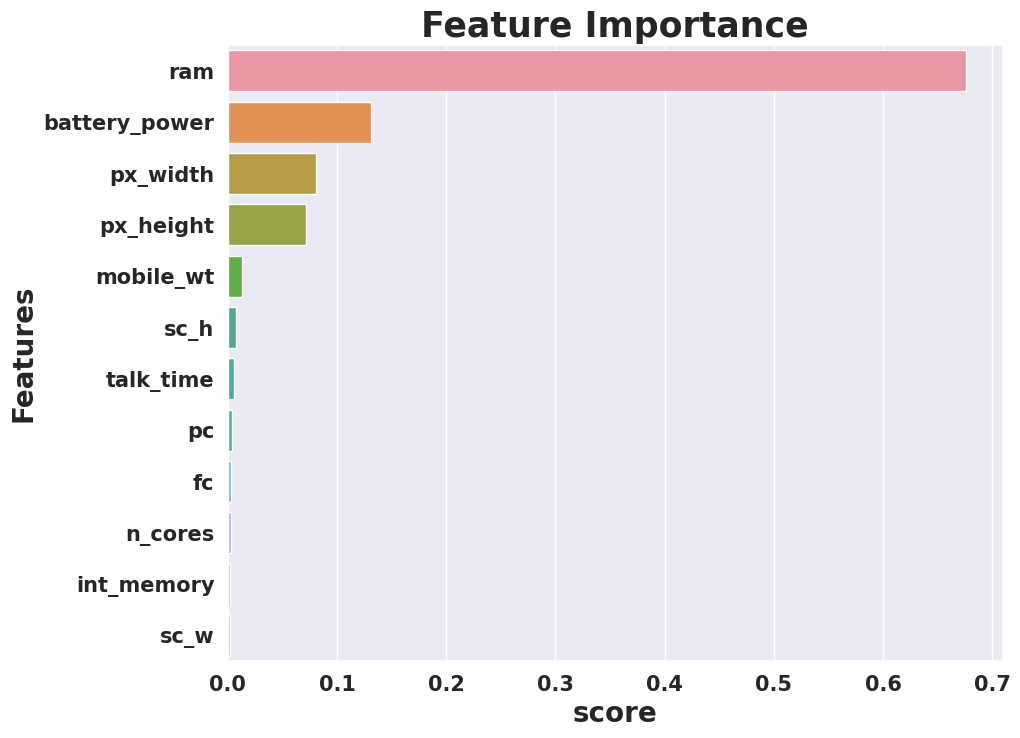

In [ ]:
#plotting feature importances
plot_feature_importance(dtc_optimal)

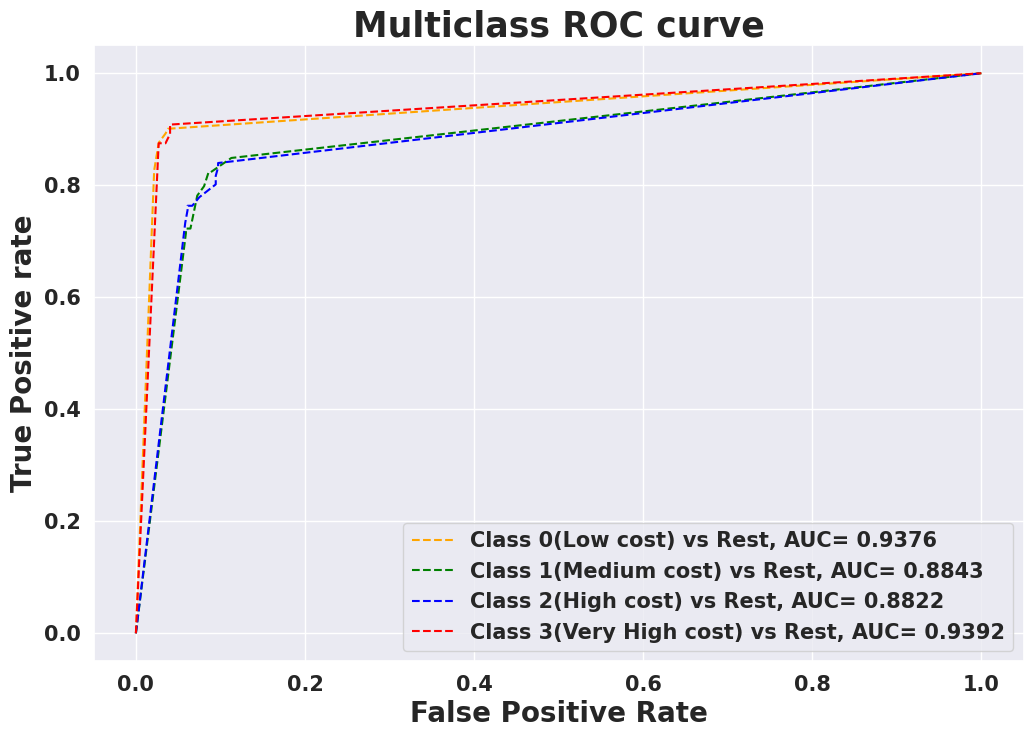

In [ ]:
# Plot AUC ROC curve.
pred_prob = dtc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

### **Decision Tree Classifier-Observations:**
* ***Train accuarcy has been reduced to 98% from 100% and test accuarcy is increased by 1% . Thus we somewhat reduced the overfiiting by reducing the training accuarcy. However this will not be good model for us.***

* ***RAM,battery power,px_height and width came out to be the most important featrures***
* ***This model classified the class 0 and class 3 very nicely as we can see the AUC is almost 0.96 for both classes,whereas for class 1 and class 2 it is 0.88.***

# **2) Random Forest Classifier:**

### **With default hyperparamters:**

In [ ]:
# splitting the data into trainset and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# creating an object of the classifier.
rfc=RandomForestClassifier(random_state=0)

In [ ]:
# fitting/training the model.
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# predicting the y values of train set and test set.
y_train_pred=rfc.predict(X_train)
y_pred=rfc.predict(X_test)

In [ ]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.890020366598778

In [ ]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[111,  10,   0,   0],
       [  7, 101,  11,   0],
       [  0,  15, 110,   6],
       [  0,   0,   5, 115]])

In [ ]:
from sklearn.metrics import confusion_matrix

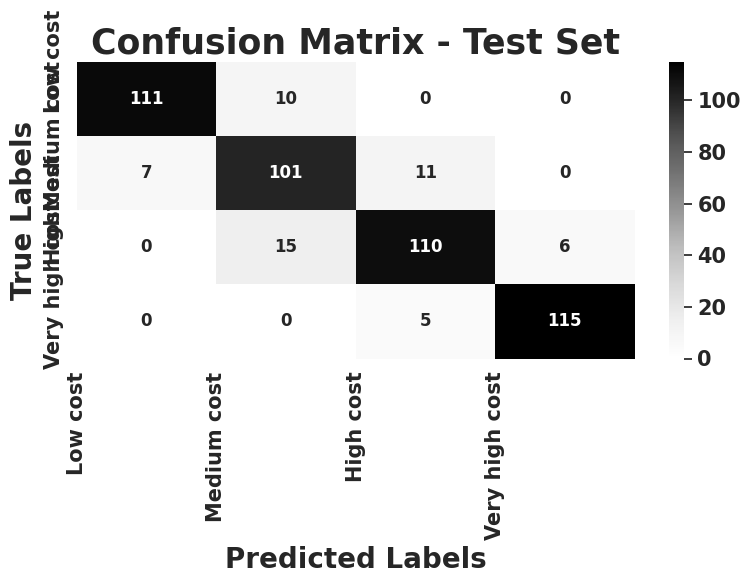

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, cmap='Greys'):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix - Test Set')
    plt.xticks(np.arange(len(classes)), classes, rotation='vertical')
    plt.yticks(np.arange(len(classes)), classes)
    plt.tight_layout()
    plt.show()
# Predict the labels for the test set
y_pred = rfc.predict(X_test)

# Define the class labels/categories
Class_cat = ['Low cost', 'Medium cost', 'High cost', 'Very high cost']

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred, Class_cat, cmap='Greys')

In [ ]:
# printing the classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       373
         1.0       1.00      1.00      1.00       373
         2.0       1.00      1.00      1.00       360
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1473
   macro avg       1.00      1.00      1.00      1473
weighted avg       1.00      1.00      1.00      1473



In [ ]:
# printing the classification report for train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       121
         1.0       0.80      0.85      0.82       119
         2.0       0.87      0.84      0.86       131
         3.0       0.95      0.96      0.95       120

    accuracy                           0.89       491
   macro avg       0.89      0.89      0.89       491
weighted avg       0.89      0.89      0.89       491



## **Observation**

* ***Train accuarcy is 100% and test accuracy is 88%. which is quite good. But model seems to be overfitted and has not generalised the data well. We need to reduce overfitting and improve the model performance.***
* ***we do some hyperparameter tunning to reduce overfitting***

### **Let's do some Hyperparamter Tunning of the Random forest model**

In [ ]:
# para_grid values to pass in gridsearchcv.
grid_values={'n_estimators':[300, 400, 500, 700],
          'max_depth':[None, 10, 20, 40],
          'min_samples_split':[2,6,10],
          'max_leaf_nodes':[None],
          'criterion':['entropy','gini'],
          'max_features':['auto','log2','sqrt']

             }

In [ ]:
# creating the instance
rfc_= RandomForestClassifier(random_state=0)

In [ ]:
# Applying GridSearchCV
rfc_tune=GridSearchCV(rfc_,param_grid=grid_values,cv=3,verbose=3,scoring='accuracy')
rfc_tune.fit(X_train,y_train)

[CV 1/3] END criterion=gini, max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_split=6, n_estimators=300;, score=0.878 total time=   0.9s
[CV 2/3] END criterion=gini, max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_split=6, n_estimators=300;, score=0.872 total time=   1.0s
[CV 3/3] END criterion=gini, max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_split=6, n_estimators=300;, score=0.902 total time=   1.0s
[CV 1/3] END criterion=gini, max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_split=6, n_estimators=400;, score=0.890 total time=   1.7s
[CV 2/3] END criterion=gini, max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_split=6, n_estimators=400;, score=0.882 total time=   1.8s
[CV 3/3] END criterion=gini, max_depth=20, max_features=log2, max_leaf_nodes=None, min_samples_split=6, n_estimators=400;, score=0.906 total time=   1.3s
[CV 1/3] END criterion=gini, max_depth=20, max_features=log2, max_leaf_nodes

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 10, 20, 40],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [None],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [300, 400, 500, 700]},
             scoring='accuracy', verbose=3)

In [ ]:
#Getting best paramters for the models
rfc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
# fitting/training the data with best parameters.
rfc_optimal=RandomForestClassifier(max_features='auto',criterion='entropy',max_depth=None,max_leaf_nodes=None,min_samples_split=6,n_estimators=700,random_state=0)
rfc_optimal.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       min_samples_split=6, n_estimators=700, random_state=0)

In [ ]:
# predicting y values of train and test set.
y_train_pred=rfc_optimal.predict(X_train)
y_pred=rfc_optimal.predict(X_test)

In [ ]:
# checking the train accuracy score.
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# checking the test accuracy score.
accuracy_score(y_test,y_pred)

0.8839103869653768

In [ ]:
# getting confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[113,   8,   0,   0],
       [  7,  98,  14,   0],
       [  0,  16, 109,   6],
       [  0,   0,   6, 114]])

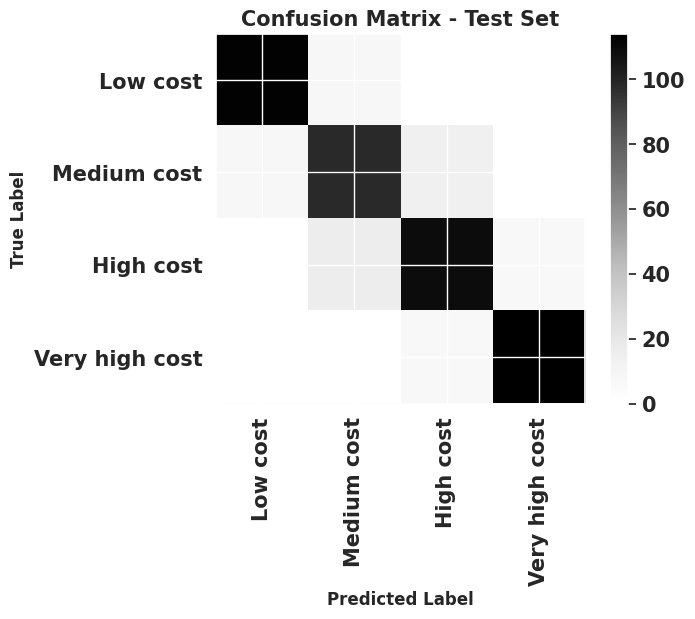

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Calculate confusion matrix
y_pred = rfc_optimal.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap='Greys')
plt.title('Confusion Matrix - Test Set', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(Class_cat))
plt.xticks(tick_marks, Class_cat, rotation='vertical')
plt.yticks(tick_marks, Class_cat)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

In [ ]:
# printing the classification report for train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       373
         1.0       1.00      1.00      1.00       373
         2.0       1.00      1.00      1.00       360
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1473
   macro avg       1.00      1.00      1.00      1473
weighted avg       1.00      1.00      1.00      1473



In [ ]:
# printing the classification report for train set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       121
         1.0       0.80      0.82      0.81       119
         2.0       0.84      0.83      0.84       131
         3.0       0.95      0.95      0.95       120

    accuracy                           0.88       491
   macro avg       0.88      0.88      0.88       491
weighted avg       0.88      0.88      0.88       491



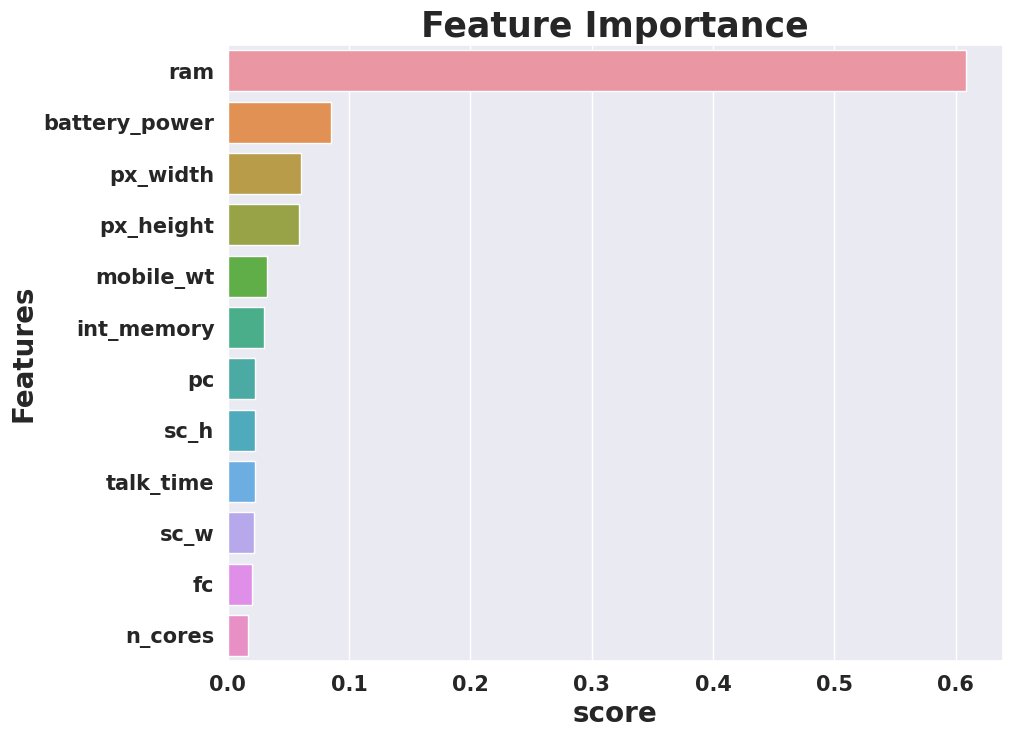

In [ ]:
#plotting feature importances
plot_feature_importance(rfc_optimal)

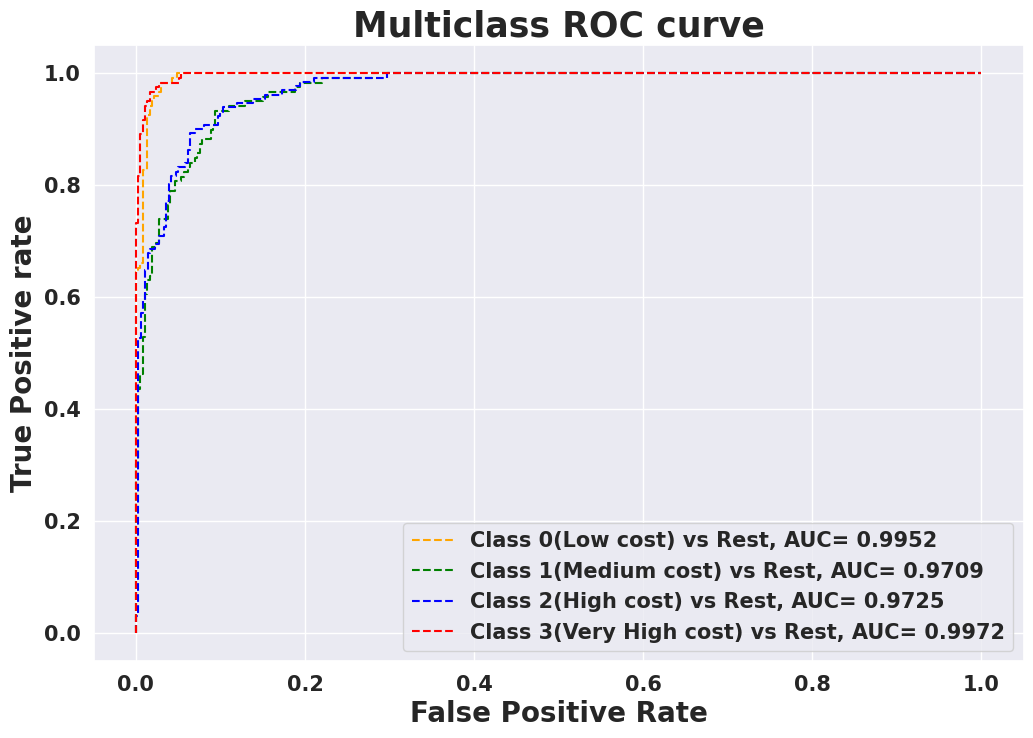

In [ ]:
# Plot AUC ROC curve.
pred_prob = rfc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

###**Random Forest Classifier Observations:**
***Before Tuning***
* ***training accuarcy = 100%***
* ***test accuarcy = 88%***

***Model is overfitted the data and does not generalised well. So we tuned the hyperparameters.***

***After tuning:***
* ***Training accuarcy= 100%***
* ***Test accuarcy = 90%***

***we have slightly improved the model and overfitting is reduced slightly.***

***From roc curve its clear that model has poorly performed to classify class 1 and class 2.***

# **3)Gradient Boosting Classifier:**

### **With default hyperparameters:**

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)

In [ ]:
# fittng/training the data.
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
# predicting y values of train and test set.
y_train_pred=gbc.predict(X_train)
y_pred=gbc.predict(X_test)

In [ ]:
# checking the accuracy score of train data.
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

0.9042769857433809

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[111,  10,   0,   0],
       [  5, 106,   8,   0],
       [  0,  13, 112,   6],
       [  0,   0,   5, 115]])

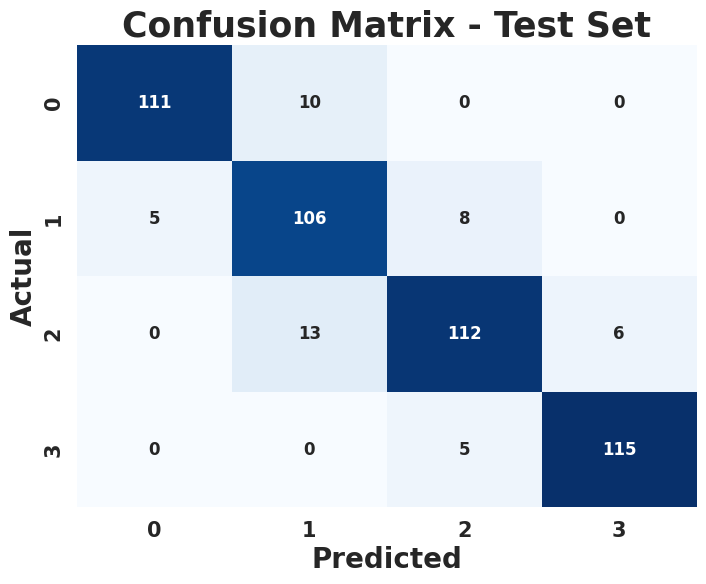

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predicted labels from your classifier
y_pred = gbc.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [ ]:
# printing the classification report for train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       373
         1.0       1.00      1.00      1.00       373
         2.0       1.00      1.00      1.00       360
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1473
   macro avg       1.00      1.00      1.00      1473
weighted avg       1.00      1.00      1.00      1473



In [ ]:
# printing the classification report for train set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       121
         1.0       0.82      0.89      0.85       119
         2.0       0.90      0.85      0.88       131
         3.0       0.95      0.96      0.95       120

    accuracy                           0.90       491
   macro avg       0.91      0.91      0.91       491
weighted avg       0.91      0.90      0.90       491



### **Let's do some hyperparameter tuning.**

In [ ]:
# Creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)

In [ ]:
# para_grid values to pass in gridsearchcv.
grid_values={'learning_rate':[0.005,1,2,3],
             'min_samples_split':range(10,26)

             }

In [ ]:
# Applying GridSearchCV
gbc_tune=GridSearchCV(gbc,param_grid=grid_values,cv=3,verbose=1,scoring='accuracy')
gbc_tune.fit(X_train,y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.005, 1, 2, 3],
                         'min_samples_split': range(10, 26)},
             scoring='accuracy', verbose=1)

In [ ]:
# Getting best parameters
gbc_tune.best_params_

{'learning_rate': 1, 'min_samples_split': 24}

In [ ]:
# getting best estimators
gbc_tune.best_estimator_

GradientBoostingClassifier(learning_rate=1, min_samples_split=24,
                           random_state=0)

In [ ]:

# aplying best estimarors
gbc_optimal=GradientBoostingClassifier(learning_rate=1,random_state=0,min_samples_split=25)
gbc_optimal.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1, min_samples_split=25,
                           random_state=0)

In [ ]:
# predicting the y values of train and test set.
y_train_pred=gbc_optimal.predict(X_train)
y_pred=gbc_optimal.predict(X_test)

In [ ]:
# train set accuracy score
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# test set accuracy score
accuracy_score(y_test,y_pred)

0.8981670061099797

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[112,   9,   0,   0],
       [  5, 106,   8,   0],
       [  0,  11, 113,   7],
       [  0,   0,  10, 110]])

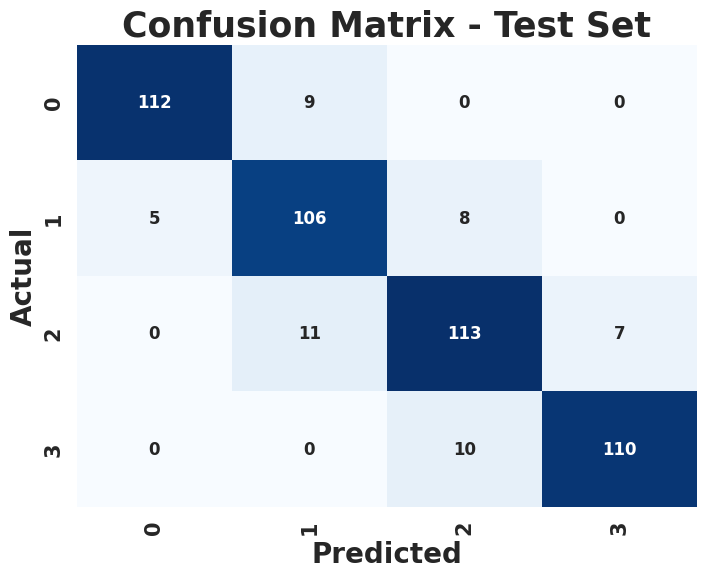

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = gbc_optimal.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set x and y axis labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Set tick labels rotation
plt.xticks(rotation='vertical')

# Set title and display the plot
plt.title('Confusion Matrix - Test Set')
plt.show()

In [ ]:
# printing the classification report of train set.
print(classification_report(y_train,y_train_pred))

In [ ]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94       121
         1.0       0.84      0.89      0.87       119
         2.0       0.86      0.86      0.86       131
         3.0       0.94      0.92      0.93       120

    accuracy                           0.90       491
   macro avg       0.90      0.90      0.90       491
weighted avg       0.90      0.90      0.90       491



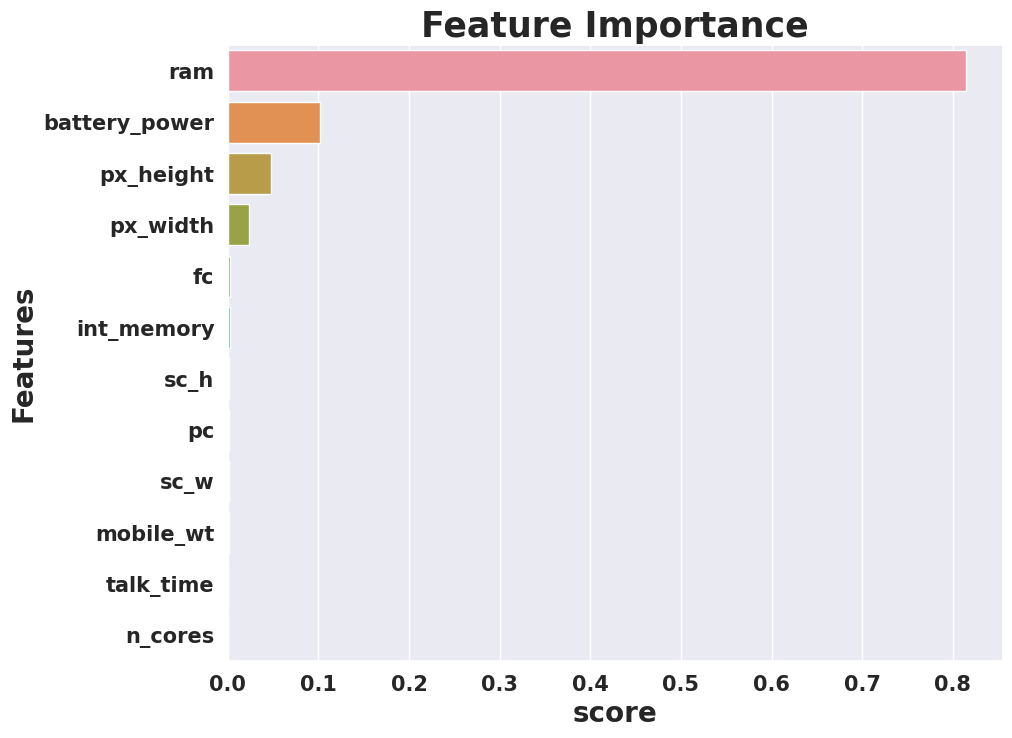

In [ ]:
#plotting feature importances
plot_feature_importance(gbc_optimal)

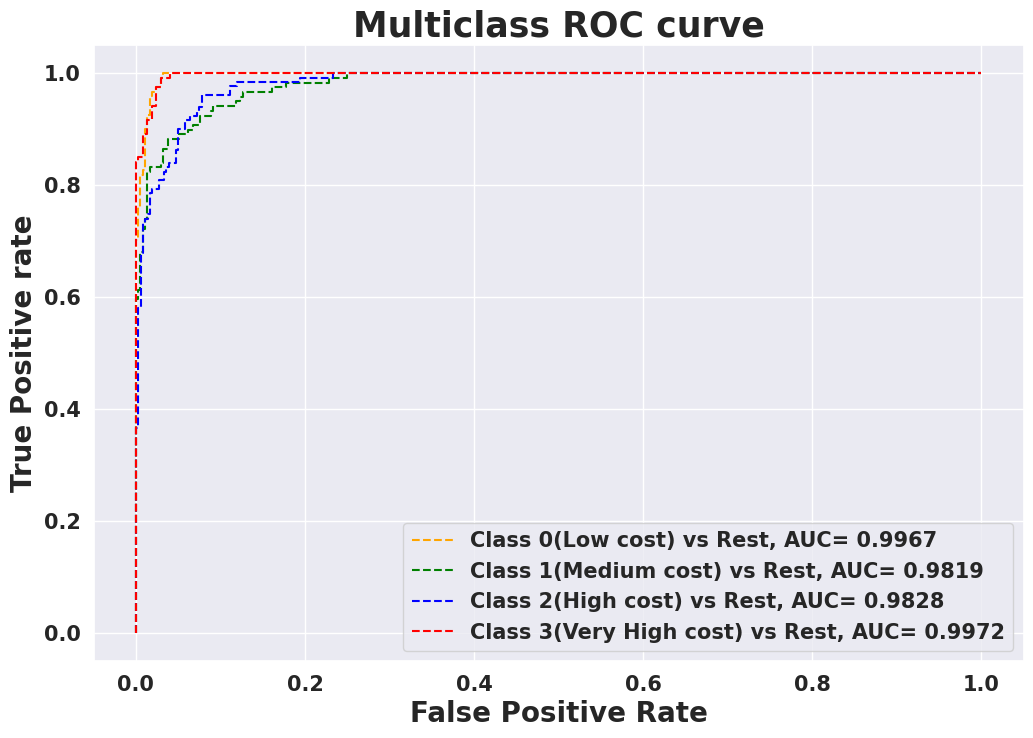

In [ ]:
# Plot AUC ROC curve.
pred_prob = gbc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

### **Gradient Boost Classifiers Observations:**

***Before tunning:***
* ***Train accuracy score= 100%.***
* ***Test accuracy score= 89%***

***Model did not generalised well and overfitted the training data.*** ***so we tuned hyperparameters of model.***

***After Hyperparameter Tuning***
* ***Train accuracy score= 100%***
* ***Test accuarcy score=90%***

***Thus we slightly improved the model performance.However the model is not best.***





***From ROC curve it's clear that model was good to classify the class 0 and class 3.From the classification report its clear that recall for class 0 and class 3 is also good which is 96% and 90% respectively.***


# **4)K Nearest Neighbors Classifier (KNN)**

### **With default hyperparametrs:**

In [ ]:
knn=KNeighborsClassifier()     # creating an object of the classifier
knn.fit(X_train_scaled,y_train)   #  fitting the data

KNeighborsClassifier()

In [ ]:
# predicting the y values of train and test set.
y_train_pred=knn.predict(X_train_scaled)
y_pred=knn.predict(X_test_scaled)

In [ ]:
# checking the accuracy score of train set
accuracy_score(y_train,y_train_pred)

0.7691785471826205

In [ ]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.5987780040733197

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[97, 23,  1,  0],
       [34, 65, 20,  0],
       [ 3, 56, 59, 13],
       [ 0, 10, 37, 73]])

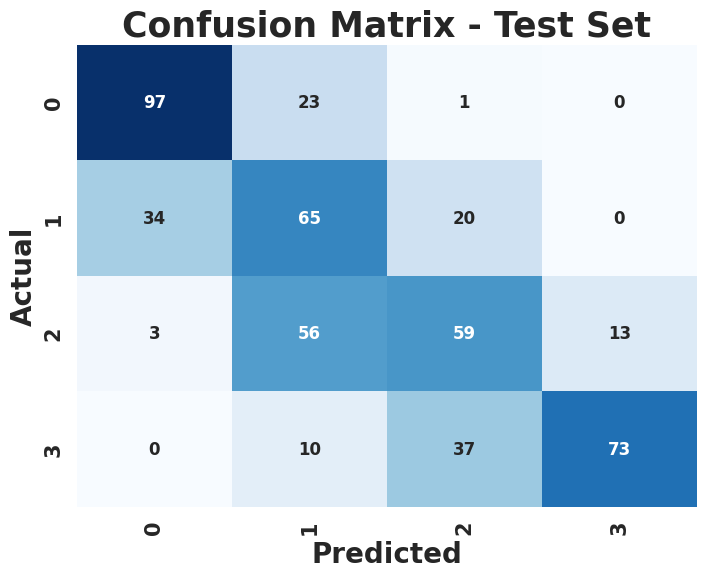

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predicted labels from classifier
y_pred = knn.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set x and y axis labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Set tick labels rotation
plt.xticks(rotation='vertical')

# Set title and display the plot
plt.title('Confusion Matrix - Test Set')
plt.show()

In [ ]:
# printing the classification report of test set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       373
         1.0       0.64      0.71      0.67       373
         2.0       0.71      0.70      0.71       360
         3.0       0.95      0.82      0.88       367

    accuracy                           0.77      1473
   macro avg       0.78      0.77      0.77      1473
weighted avg       0.78      0.77      0.77      1473



In [ ]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.80      0.76       121
         1.0       0.42      0.55      0.48       119
         2.0       0.50      0.45      0.48       131
         3.0       0.85      0.61      0.71       120

    accuracy                           0.60       491
   macro avg       0.62      0.60      0.61       491
weighted avg       0.62      0.60      0.60       491



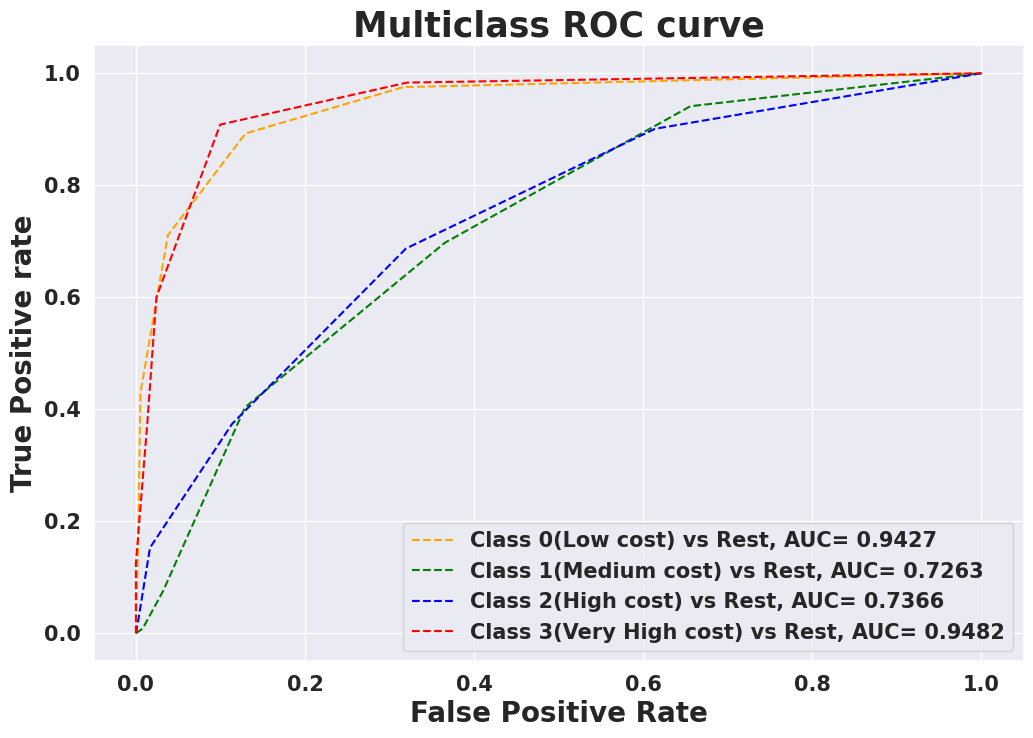

In [ ]:
# Plot AUC ROC curve.
pred_prob = knn.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

### **Let's do some HyperParameter tuning.**

In [ ]:
# creating an object of classifier
knn=KNeighborsClassifier()

In [ ]:
# parameter grid values.
grid_values = {'n_neighbors':list(range(1, 31))}

In [ ]:
# applyong GridSearchCv with above grid values and cv=5
knn_tune=GridSearchCV(knn,cv=5,scoring='accuracy',verbose=3,param_grid=grid_values)
knn_tune.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.566 total time=   0.1s
[CV 2/5] END .....................n_neighbors=1;, score=0.576 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.563 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.582 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.568 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.529 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.498 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.508 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.571 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.520 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.529 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=3)

In [ ]:
# getting thge best parameters
knn_tune.best_params_                     # thus  best n_neighnors came out to be 29

{'n_neighbors': 29}

In [ ]:
# fitting the data with best parameters
knn_optimal=KNeighborsClassifier(n_neighbors=29)
knn_optimal.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=29)

In [ ]:
# predicting y values of train and test set.
y_train_pred=knn_optimal.predict(X_train_scaled)
y_pred=knn_optimal.predict(X_test_scaled)

In [ ]:
#checking the accuracy score of train set.
accuracy_score(y_train,y_train_pred)

0.7542430414120842

In [ ]:
# checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.639511201629328

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[104,  17,   0,   0],
       [ 29,  70,  20,   0],
       [  1,  48,  65,  17],
       [  0,   1,  44,  75]])

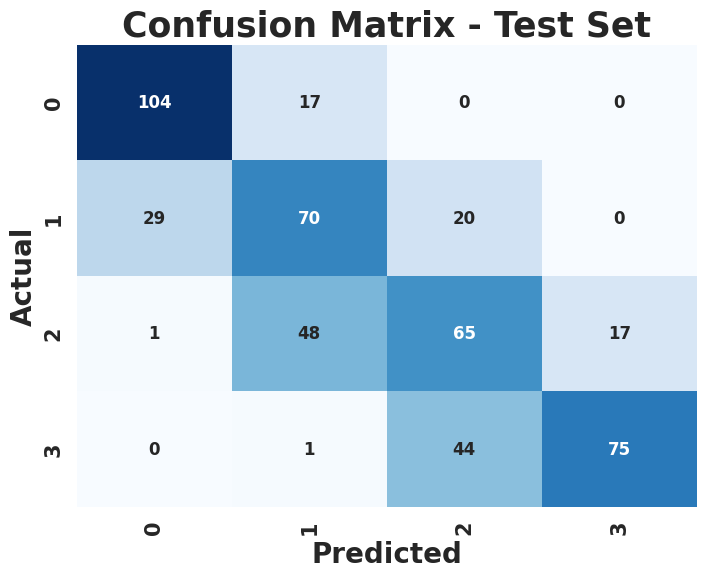

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predicted labels from  classifier
y_pred = knn_optimal.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set x and y axis labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Set tick labels rotation
plt.xticks(rotation='vertical')

# Set title and display the plot
plt.title('Confusion Matrix - Test Set')
plt.show()

In [ ]:
# printig tye classification report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85       373
         1.0       0.69      0.65      0.67       373
         2.0       0.65      0.70      0.67       360
         3.0       0.89      0.77      0.83       367

    accuracy                           0.75      1473
   macro avg       0.76      0.75      0.75      1473
weighted avg       0.76      0.75      0.75      1473



In [ ]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       121
         1.0       0.51      0.59      0.55       119
         2.0       0.50      0.50      0.50       131
         3.0       0.82      0.62      0.71       120

    accuracy                           0.64       491
   macro avg       0.65      0.64      0.64       491
weighted avg       0.65      0.64      0.64       491



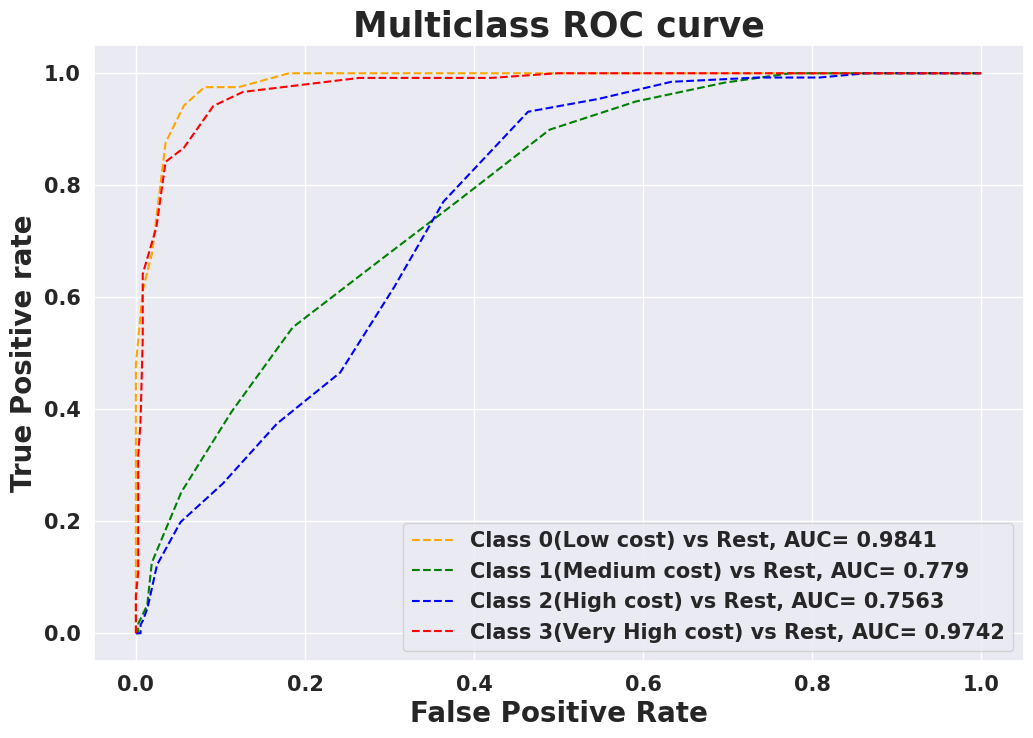

In [ ]:
# Plot AUC ROC curve.
pred_prob = knn_optimal.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

### **K Nearest Neighbors Classifier (KNN) Observations:**
***Before hyperparameters tuning:***

* ***Train Accuracy:75 %***
* ***Test Accuarcy:59 %***

***Clearly Model has performed very worst. We did hyperparameter tuning***

***After Hyperparameter Tuning:***

* ***Train Accuarcy: 77%***
* ***Test Accuarcy: 70%***

***Surely we improved the model perfromance and reduced overfitting but however this is not  good model for us.***



# **5) XG Boost Classifier:**

### **With default hyperparameter**

In [ ]:
# spltting the data into train test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
xgb=XGBClassifier()        # creating an object of the classifier
xgb.fit(X_train,y_train)      # fitting the data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
# predicting y values of train and test data.
y_train_pred=xgb.predict(X_train)
y_pred=xgb.predict(X_test)

In [ ]:
# checking the accuracy score of train set
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

0.8940936863543788

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[111,  10,   0,   0],
       [  5, 104,  10,   0],
       [  0,  10, 113,   8],
       [  0,   0,   9, 111]])

In [ ]:
# printing the classification report of train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       373
         1.0       1.00      1.00      1.00       373
         2.0       1.00      1.00      1.00       360
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1473
   macro avg       1.00      1.00      1.00      1473
weighted avg       1.00      1.00      1.00      1473



In [ ]:
# printing the classification report of the test set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       121
         1.0       0.84      0.87      0.86       119
         2.0       0.86      0.86      0.86       131
         3.0       0.93      0.93      0.93       120

    accuracy                           0.89       491
   macro avg       0.90      0.89      0.90       491
weighted avg       0.90      0.89      0.89       491



### **Observations:**

**Here Train accuracy is 98% and**
**Test Accuarcy is 90 %**

### **Let's Do some Hyperparameter tuning:**

In [ ]:

# parameter grid values for GridSearchCv
grid_values={
          'learning_rate':[0.6,1],
          'n_estimators':[500,1000],
          'gamma':[0.2],
          'subsample':[0.5,0.6]
          }

In [ ]:
# creating an object of the classifier
xgb = XGBClassifier()

# applying girdsearchcv
xgb_tune = GridSearchCV(xgb, grid_values, cv=3,verbose=4)
xgb_tune.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.900 total time=   1.8s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.902 total time=   1.7s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.921 total time=   1.7s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.916 total time=   1.9s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.904 total time=   3.7s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.927 total time=   1.9s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.898 total time=   3.3s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.902 total time=   3.2s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.2], 'learning_rate': [0.6, 1],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.6]},
             verbose=4)

In [ ]:
xgb_tune.best_params_

{'gamma': 0.2, 'learning_rate': 0.6, 'n_estimators': 500, 'subsample': 0.6}

In [ ]:
xgb_opti=XGBClassifier(learning_rate=.6,gamma=0.2,n_estimators=1000,subsample=0.5)
xgb_opti.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_train_pred=xgb_opti.predict(X_train)
y_pred=xgb_opti.predict(X_test)

In [ ]:
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
accuracy_score(y_test,y_pred)

0.8940936863543788

In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[110,  11,   0,   0],
       [  5, 107,   7,   0],
       [  0,  14, 110,   7],
       [  0,   0,   8, 112]])

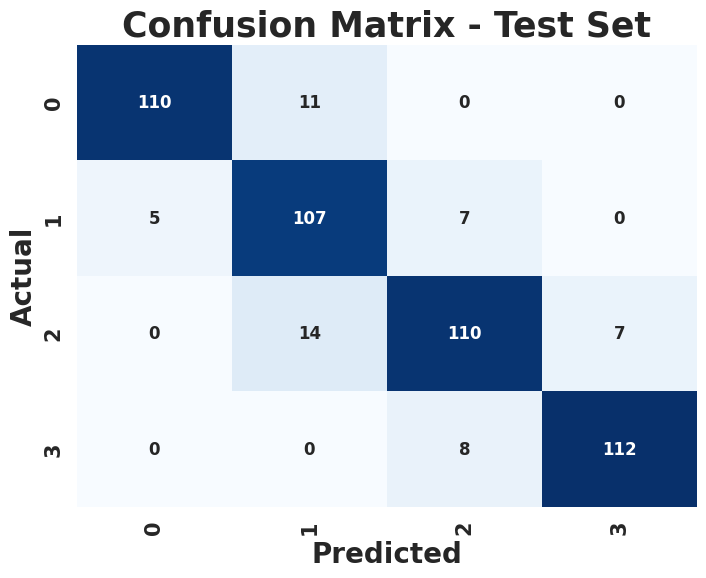

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predicted labels from your classifier
y_pred = xgb_opti.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set x and y axis labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Set tick labels rotation
plt.xticks(rotation='vertical')

# Set title and display the plot
plt.title('Confusion Matrix - Test Set')
plt.show()

In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       373
         1.0       1.00      1.00      1.00       373
         2.0       1.00      1.00      1.00       360
         3.0       1.00      1.00      1.00       367

    accuracy                           1.00      1473
   macro avg       1.00      1.00      1.00      1473
weighted avg       1.00      1.00      1.00      1473



In [ ]:
#printing the classifiaction report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93       121
         1.0       0.81      0.90      0.85       119
         2.0       0.88      0.84      0.86       131
         3.0       0.94      0.93      0.94       120

    accuracy                           0.89       491
   macro avg       0.90      0.90      0.90       491
weighted avg       0.90      0.89      0.89       491



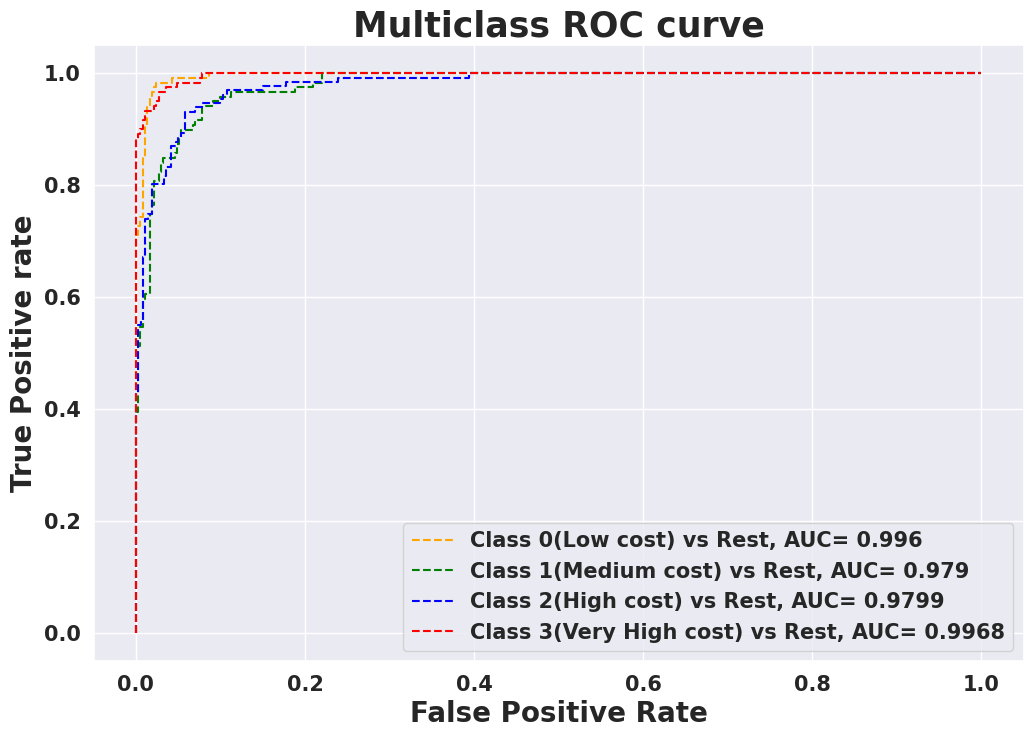

In [ ]:
# Plot AUC ROC curve.
pred_prob = xgb_opti.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

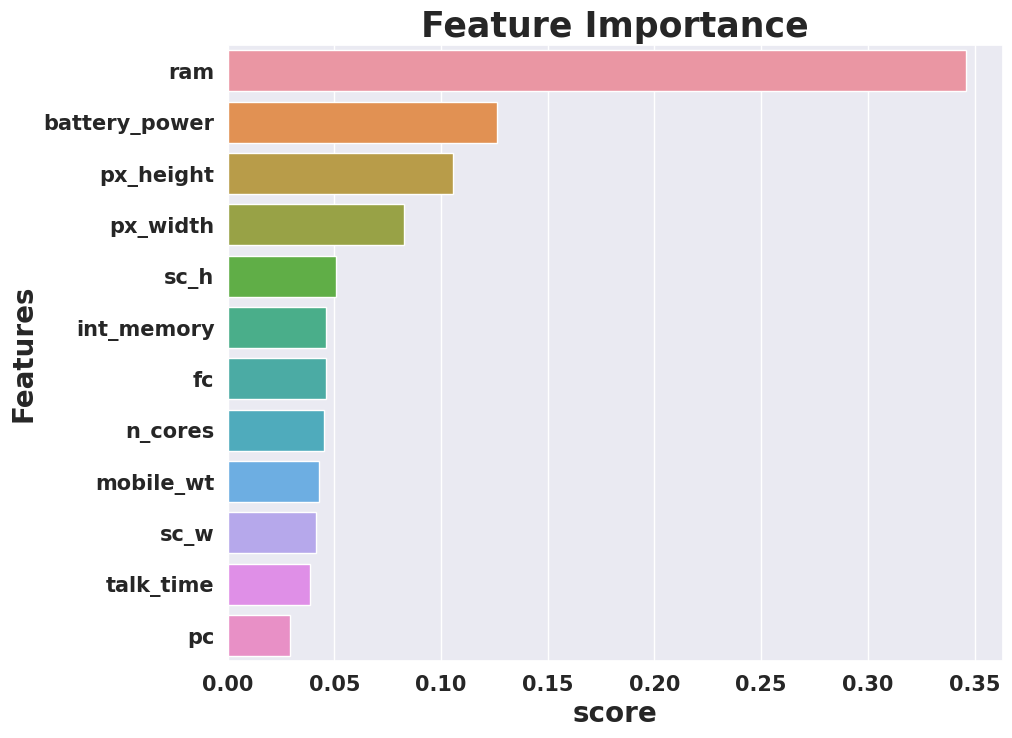

In [ ]:
#plotting feature importances
plot_feature_importance(xgb_opti)

### **Observations**

***Before hyperparameter Tuning***
* ***Train Accuarcy = 98%***
* ***Test Accuarcy = 90%***

***After hyperparameter Tuning***
* ***Train Accuarcy = 1%***
* ***Test Accuarcy = 92%***

***we have improved the model performance by Hyperparamter tuning. Test accuracy is increased to 92%.But still the difference of accuracy score between train and test is  more than 5%.We can say model is very slightly overfitted***

***From AUC-ROC curve its clear that model has almost correctly predicted the class 0 and class 3.***


#SVM

### **with default parameters.**

In [ ]:
# Import all relevant libraries

from sklearn.svm import SVC

In [ ]:
svc = SVC(random_state=101)      # creating an object of classifier
svc.fit(X_train_scaled,y_train)    # fitting the model/training the model.

SVC(random_state=101)

In [ ]:
# predicting the y value of train set and test set
y_train_pred=svc.predict(X_train_scaled)
y_pred=svc.predict(X_test_scaled)


In [ ]:
# Accuracy score for train set
accuracy_score(y_train,y_train_pred)

0.9809911744738629

In [ ]:
# Accuracy score for test set.
accuracy_score(y_test,y_pred)

0.9042769857433809

In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[113,   8,   0,   0],
       [  4, 106,   9,   0],
       [  0,  13, 111,   7],
       [  0,   0,   6, 114]])

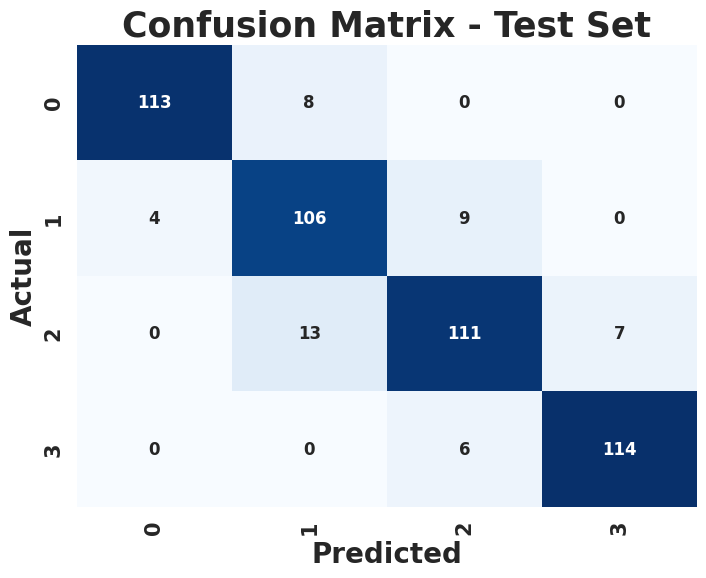

In [ ]:
# Get the predicted labels from your classifier
y_pred = svc.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set x and y axis labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Set tick labels rotation
plt.xticks(rotation='vertical')

# Set title and display the plot
plt.title('Confusion Matrix - Test Set')
plt.show()

In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       373
         1.0       0.97      0.98      0.97       373
         2.0       0.96      0.97      0.97       360
         3.0       0.99      0.98      0.99       367

    accuracy                           0.98      1473
   macro avg       0.98      0.98      0.98      1473
weighted avg       0.98      0.98      0.98      1473



In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       121
         1.0       0.83      0.89      0.86       119
         2.0       0.88      0.85      0.86       131
         3.0       0.94      0.95      0.95       120

    accuracy                           0.90       491
   macro avg       0.91      0.91      0.91       491
weighted avg       0.91      0.90      0.90       491



### **Hyperparameter Tuning**

In [ ]:
# parameter grid for GridSearchCv
grid_values = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

In [ ]:
# creating an object for classifier
svm  = SVC ()

In [ ]:
# Hyperparameter tuning with the GrdiSearhCV with cv=5
svm_cv = GridSearchCV(svm, grid_values, cv = 5,verbose=2)
svm_cv.fit(X_train_scaled,y_train)     # fitting the data into the model

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ...........C=0.01, degree=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ...........C=0.01, degree=1, gamma=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [ ]:
# getting the best parameters
svm_cv.best_params_

{'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}

In [ ]:
# getting the best estimators
svm_cv.best_estimator_

SVC(C=10, degree=1, gamma=0.01, kernel='linear')

In [ ]:
# applying best parameters to the SVm model.
svm_optimal=SVC(C=10, degree=1, gamma=0.01, kernel='linear',probability=True)
svm_optimal.fit(X_train_scaled,y_train)   # fitting the data

SVC(C=10, degree=1, gamma=0.01, kernel='linear', probability=True)

In [ ]:
# predicting the y values of train and test set.
y_train_pred=svm_optimal.predict(X_train_scaled)
y_pred=svm_optimal.predict(X_test_scaled)

In [ ]:
y_train_pred

array([0., 1., 0., ..., 1., 3., 2.])

In [ ]:
y_pred

array([1., 2., 0., 0., 1., 1., 3., 2., 1., 2., 2., 1., 2., 1., 0., 0., 1.,
       2., 0., 1., 2., 1., 1., 2., 1., 0., 0., 0., 0., 1., 1., 3., 3., 2.,
       0., 3., 0., 2., 2., 2., 2., 2., 2., 3., 2., 0., 2., 0., 1., 2., 2.,
       1., 3., 1., 1., 0., 3., 3., 0., 2., 0., 3., 0., 0., 2., 1., 3., 0.,
       0., 2., 0., 3., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2.,
       3., 0., 0., 3., 0., 3., 3., 3., 1., 1., 3., 2., 1., 3., 2., 1., 0.,
       2., 2., 1., 2., 2., 0., 0., 0., 0., 3., 1., 3., 1., 2., 3., 3., 1.,
       2., 3., 0., 3., 1., 2., 2., 1., 1., 1., 1., 1., 0., 2., 2., 2., 0.,
       3., 0., 2., 0., 0., 3., 3., 1., 2., 3., 3., 2., 2., 0., 3., 3., 3.,
       0., 3., 0., 3., 0., 2., 1., 0., 0., 3., 3., 3., 0., 0., 1., 3., 1.,
       2., 2., 1., 1., 2., 2., 3., 1., 1., 3., 3., 0., 2., 2., 2., 1., 1.,
       1., 1., 2., 1., 3., 0., 1., 3., 3., 0., 3., 2., 0., 1., 3., 3., 3.,
       3., 0., 1., 3., 1., 1., 1., 2., 3., 2., 0., 2., 0., 1., 2., 0., 0.,
       2., 2., 0., 2., 1.

In [ ]:
# checkig the accuracy score of train set.
accuracy_score(y_train,y_train_pred)

0.9823489477257298

In [ ]:
# checking the accuracy of test data
accuracy_score(y_test,y_pred)

0.9775967413441955

In [ ]:
# Confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[121,   0,   0,   0],
       [  4, 114,   1,   0],
       [  0,   4, 126,   1],
       [  0,   0,   1, 119]])

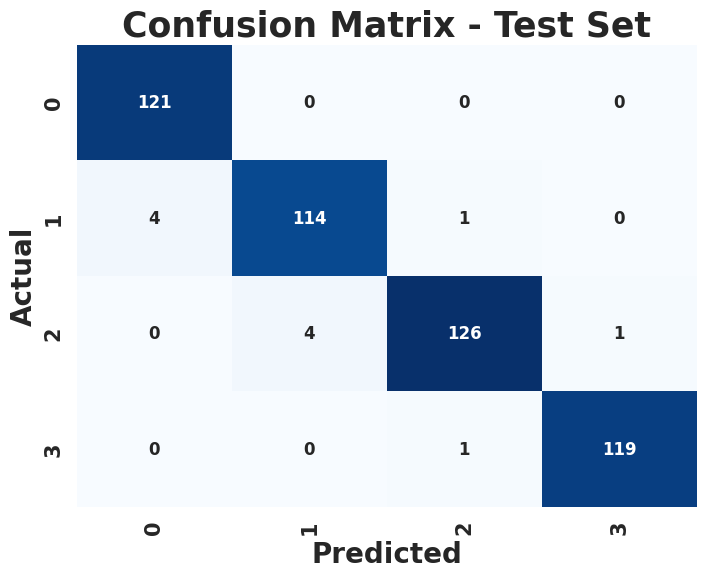

In [ ]:
y_pred = svm_optimal.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set x and y axis labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Set tick labels rotation
plt.xticks(rotation='vertical')

# Set title and display the plot
plt.title('Confusion Matrix - Test Set')
plt.show()

In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       373
         1.0       0.98      0.98      0.98       373
         2.0       0.97      0.97      0.97       360
         3.0       0.98      0.99      0.99       367

    accuracy                           0.98      1473
   macro avg       0.98      0.98      0.98      1473
weighted avg       0.98      0.98      0.98      1473



In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       121
         1.0       0.97      0.96      0.96       119
         2.0       0.98      0.96      0.97       131
         3.0       0.99      0.99      0.99       120

    accuracy                           0.98       491
   macro avg       0.98      0.98      0.98       491
weighted avg       0.98      0.98      0.98       491



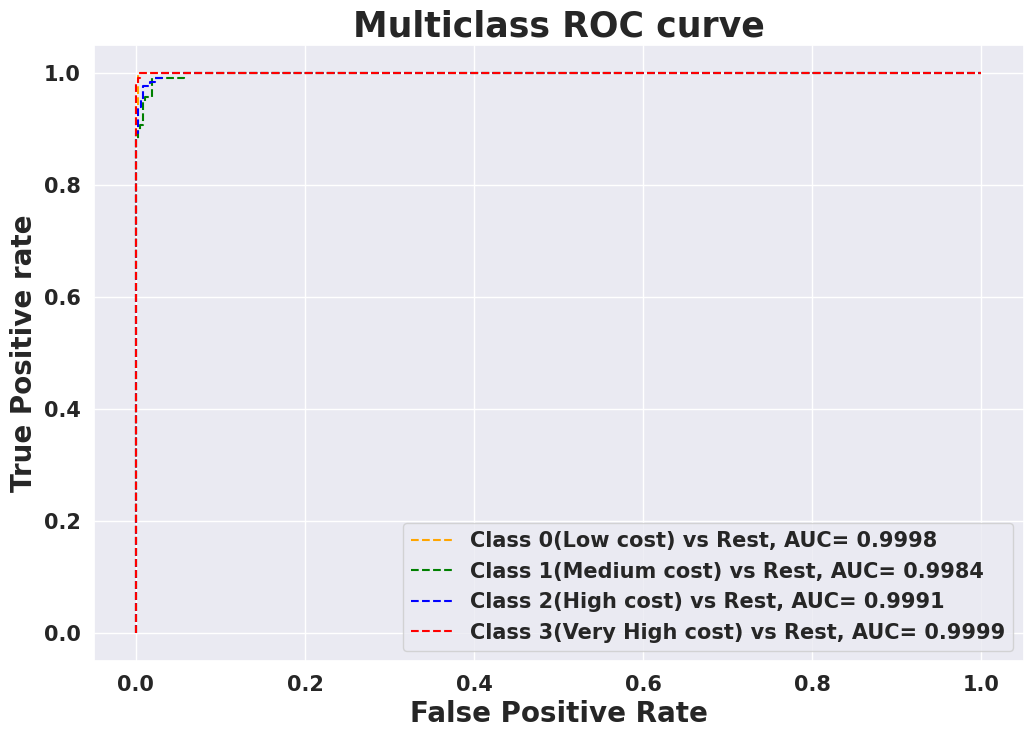

In [ ]:
# Plot AUC ROC curve.
pred_prob = svm_optimal.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

<Axes: >

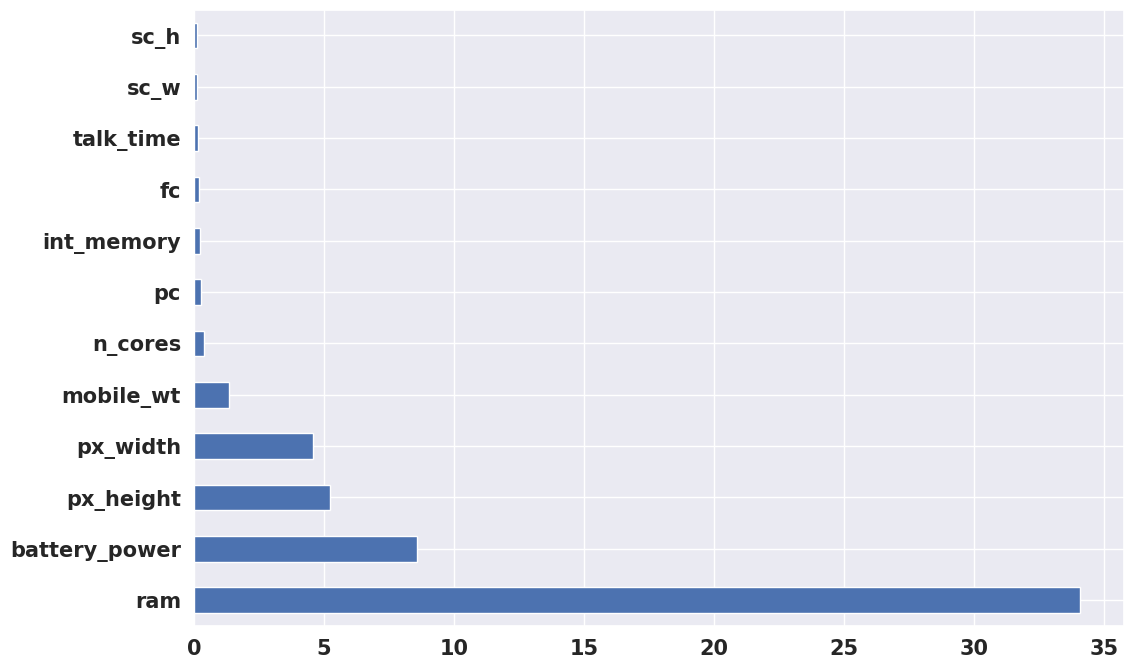

In [ ]:
plt.figure(figsize=(12,8))
pd.Series(abs(svm_optimal.coef_[0])+abs(svm_optimal.coef_[1])+abs(svm_optimal.coef_[2])+abs(svm_optimal.coef_[3]), index=X_train.columns).nlargest(12).plot(kind='barh')

### **Observations**


* ***Accuracy score on train set is 98.5% and Test score is 89%.***
***Model seems to be overfitted as the differance between train and test accuracy score is almot 10%.***
* ***After Hyperparameter tuning train accuracy remained almost same  98.3% and test accuracy score increased to 97%.***
*  ***SVM performed very well as compared to other alogorithms.***
* ***In terms of feature importance RAM,Battery power,px_height and px_weight are the imporatant features.***
* ***f1 score for individual classes is also very good. Area under curve for each class prediction is also almost 1.***

# ***Conclusion:***



➢ Target variable has equal number of observation in each category and target variable is nearly equally distributed.

➢ Percentage Distribution of Mobiles having bluetooth, dual sim, 4G,wifi and touch screen are almost 50 % and very few mobiles (23.8%) do not
have 3G.

➢ Price range is having strong positive correlation with RAM. As we know mobiles with high RAM are costly.

➢ Price range has positive correlation with Battery power. Mostly high price mobiles are having great battery backup.Support Vector Machine (SMV) algorithm gave best performance after hyper-
parameter tunning with 98.3% train accuracy and 97% is test accuracy.

➢ XG boost is the second best good model which gave good performance after hyper-parameter tuning with 100% train accuracy and 92.25% test accuracy
score.

➢ KNN gave vile model performance.